# Propósito

Este notebook tem como objetivo realizar uma análise exploratória de algumas colunas de interesse das medições dos sensores de qualidade do ar.

O principal objetivo será verificar a distribuição de cada coluna e determinar se elas seguem uma distribuição normal. Para isso, utilizaremos técnicas como o **Teste de Shapiro-Wilk** e o **Q-Q Plot**, que nos ajudarão a verificar a aderência à normalidade.

Em seguida, as colunas que não apresentarem uma distribuição normal serão transformadas utilizando técnicas como **Box-Cox** para aproximá-las de uma distribuição normal.

Por fim, geraremos gráficos de histograma para visualizar se as transformações resultaram em uma distribuição mais próxima da normalidade.

# Importações

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy.stats import shapiro, anderson, boxcox, kstest, norm
from scipy.special import boxcox1p
from scipy import stats

# Consumindo bases

In [149]:
url_sensor_bangu = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_bangu_preenchido.csv'
url_sensor_campo_grande = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_campo_grande_preenchido.csv'
url_sensor_pedra_guaratiba = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_pedra_guaratiba_preenchido.csv'
url_sensor_iraja = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_iraja_preenchido.csv'
url_sensor_tijuca = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_tijuca_preenchido.csv'
url_sensor_sao_cristovao = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_sao_cristovao_preenchido.csv'
url_sensor_copacabana = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_copacabana_preenchido.csv'
url_sensor_centro = '/content/drive/MyDrive/TCC/sensores-2011-2021/Análise Exploratória/resultados/df_sensor_centro_preenchido.csv'

df_sensor_bangu = pd.read_csv(url_sensor_bangu, sep=',')
df_sensor_campo_grande = pd.read_csv(url_sensor_campo_grande, sep=',')
df_sensor_pedra_guaratiba = pd.read_csv(url_sensor_pedra_guaratiba, sep=',')
df_sensor_iraja = pd.read_csv(url_sensor_iraja, sep=',')
df_sensor_tijuca = pd.read_csv(url_sensor_tijuca, sep=',')
df_sensor_sao_cristovao = pd.read_csv(url_sensor_sao_cristovao, sep=',')
df_sensor_copacabana = pd.read_csv(url_sensor_copacabana, sep=',')
df_sensor_centro = pd.read_csv(url_sensor_centro, sep=',')

# Concatenando dataframe das estações após o tratamento

In [150]:
df_sensor = pd.concat([df_sensor_bangu, df_sensor_campo_grande, df_sensor_pedra_guaratiba, df_sensor_iraja, df_sensor_tijuca, df_sensor_sao_cristovao, df_sensor_copacabana, df_sensor_centro])

df_sensor.reset_index(drop=True, inplace=True)

In [151]:
# df_sensor.to_csv('df_sensor_interest_filtered.csv', index=False)

In [152]:
df_sensor.head()

nome_estacao                 data  chuva   temp     ur    co    no    no2  \
0  ESTAÇÃO BANGU  2012-01-01 03:30:00    0.2  24.67  95.24  0.42  2.18  15.18   
1  ESTAÇÃO BANGU  2012-01-01 04:30:00    0.4  24.72  94.13  0.35  1.63   9.50   
2  ESTAÇÃO BANGU  2012-01-01 05:30:00    0.0  24.49  92.91  0.27  1.73   8.74   
3  ESTAÇÃO BANGU  2012-01-01 06:30:00    0.2  24.54  92.59  0.21  1.18   5.51   
4  ESTAÇÃO BANGU  2012-01-01 07:30:00    0.4  24.78  90.71  0.16  0.95   8.41   

     nox   so2     o3  pm10  pm2_5 data_formatada   ano  mes  no_nulos_no_dia  \
0  17.36   NaN  28.06  81.0    NaN     2012-01-01  2012    1              NaN   
1  11.12  0.40  32.81  61.0    NaN     2012-01-01  2012    1              NaN   
2  10.47  0.12  31.61  26.0    NaN     2012-01-01  2012    1              NaN   
3   6.68  0.00  37.39  20.0    NaN     2012-01-01  2012    1              NaN   
4   9.35  0.00  33.45   7.0    NaN     2012-01-01  2012    1              NaN   

   no2_nulos_no_dia  nox_nulos_no_dia  
0               NaN               NaN  
1               NaN               NaN  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN

# Análise Exploratória de cada coluna e aplicação do Boxcox

## Chuva

### Análise exploratória

In [153]:
#@title Describe dos dados

df_sensor['chuva'].describe()

count    539201.000000
mean          0.119650
std           1.080953
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          88.000000
Name: chuva, dtype: float64

### Visualização gráfica

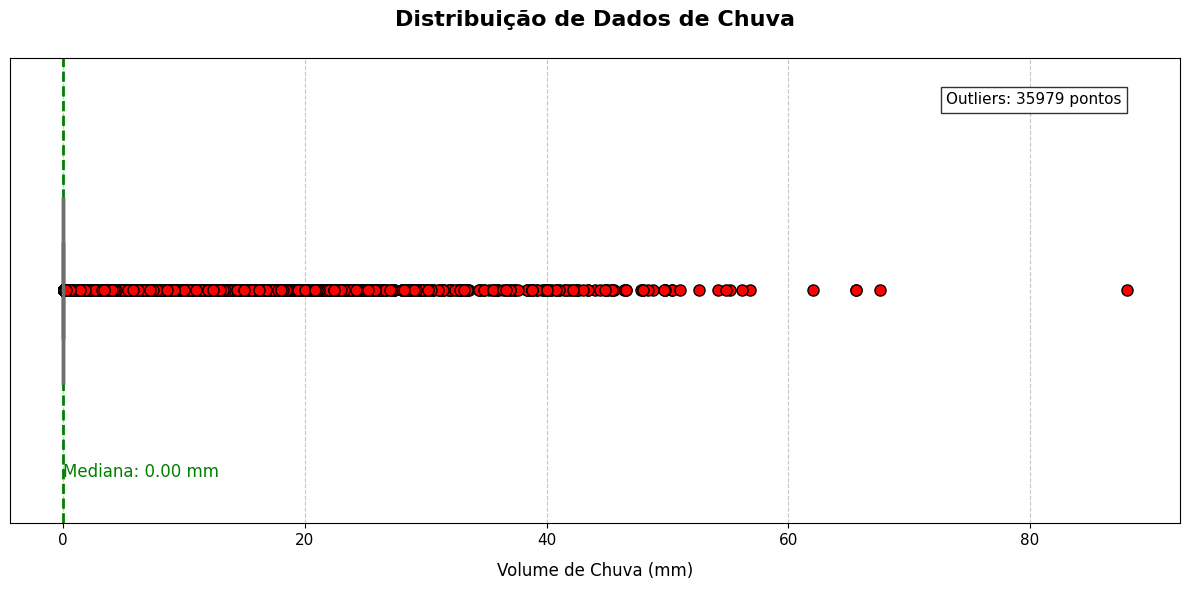

In [154]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['chuva'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Chuva\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Volume de Chuva (mm)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['chuva'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} mm',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['chuva'].quantile(0.25)
q3 = df_sensor['chuva'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['chuva'] < q1 - 1.5*iqr) |
                            (df_sensor['chuva'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

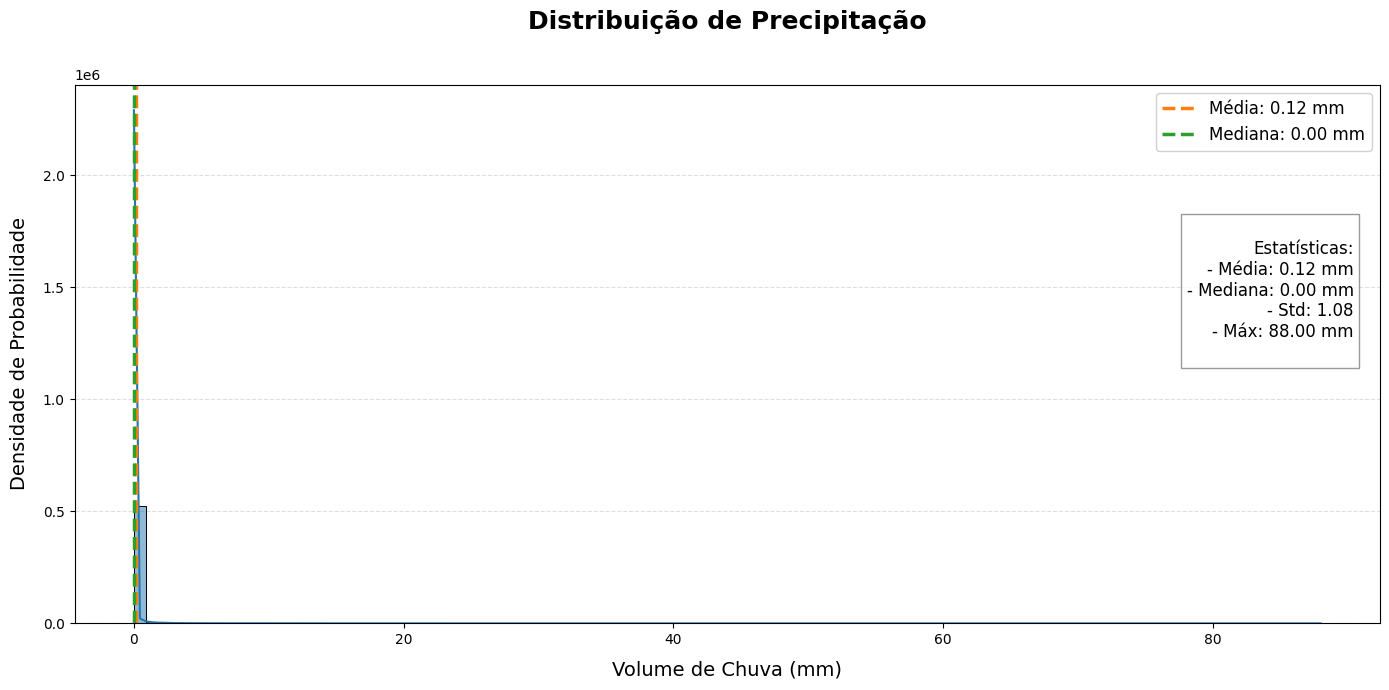

In [155]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='chuva',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Precipitação\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Volume de Chuva (mm)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['chuva'].mean()
median_val = df_sensor['chuva'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} mm')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} mm')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} mm
- Mediana: {median_val:.2f} mm
- Std: {df_sensor["chuva"].std():.2f}
- Máx: {df_sensor["chuva"].max():.2f} mm
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [156]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['chuva'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'chuva'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'chuva'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'chuva'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para chuva: Estatística = 0.077, p-valor = 0.000
chuva NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 2.5951592788388747e-56


In [157]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.479, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 2.934064311441174e-211


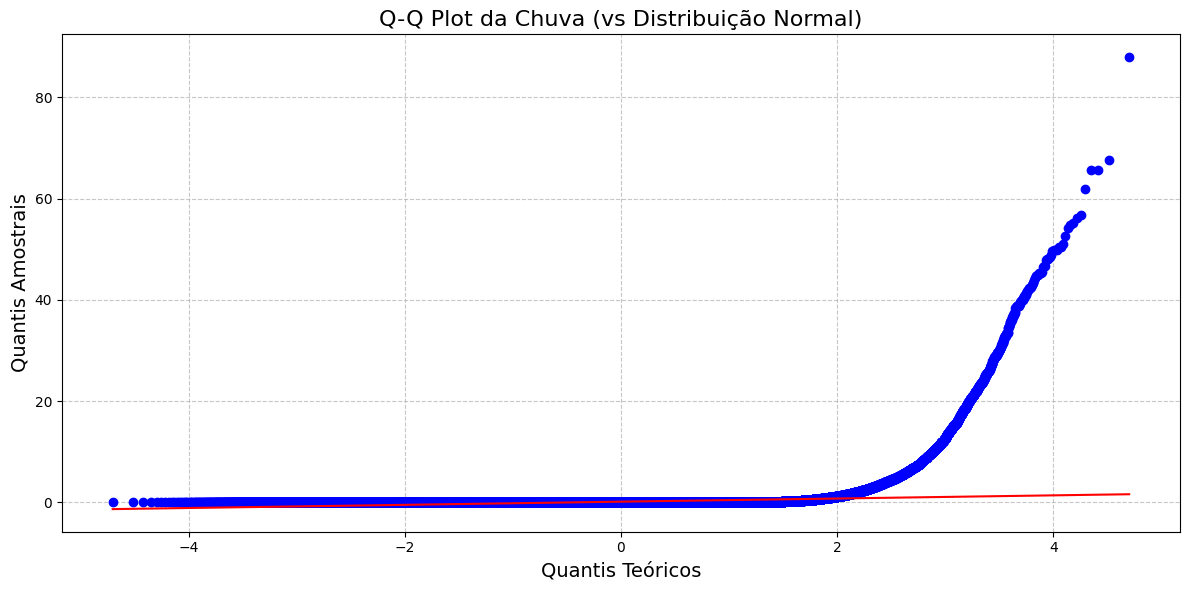

In [158]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['chuva'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Chuva (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Dados Não Normais:**

O desvio sistemático da linha, principalmente nas caudas, confirma o resultado do teste de Shapiro-Wilk (p-valor = 0.000).

Isso é típico em dados de chuva, que frequentemente têm:

- Assimetria positiva: Muitos valores baixos/zeros e alguns extremamente altos.

- Caudas pesadas: Valores de precipitação extrema que não são compatíveis com uma distribuição normal.

**Padrão de Desvio:**

Se os pontos ficam abaixo da linha no lado esquerdo e acima no lado direito, isso sugere assimetria positiva (comum em dados de chuva).

Se o gráfico mostrar uma curva em "S" ou formas não lineares, indica caudas mais pesadas ou mais leves que o esperado na normal.

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [159]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['chuva_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['chuva'].notna()
# chuva_validos = df_sensor.loc[mask, 'chuva']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'chuva_boxcox'] = boxcox1p(chuva_validos, lambda_boxcox)

In [160]:
df_sensor['chuva_boxcox'] = np.nan

mask = (df_sensor['chuva'].notna())

chuva_validos = df_sensor.loc[mask, 'chuva']

chuva_boxcox, lambda_boxcox = stats.boxcox(chuva_validos + 1)

df_sensor.loc[mask, 'chuva_boxcox'] = chuva_boxcox

### Testes de normalidade após Boxcox



In [161]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['chuva_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'chuva'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'chuva'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'chuva'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para chuva: Estatística = 0.257, p-valor = 0.000
chuva NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 1.1449455360004248e-52


In [162]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.539, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 7.571069328761363e-273


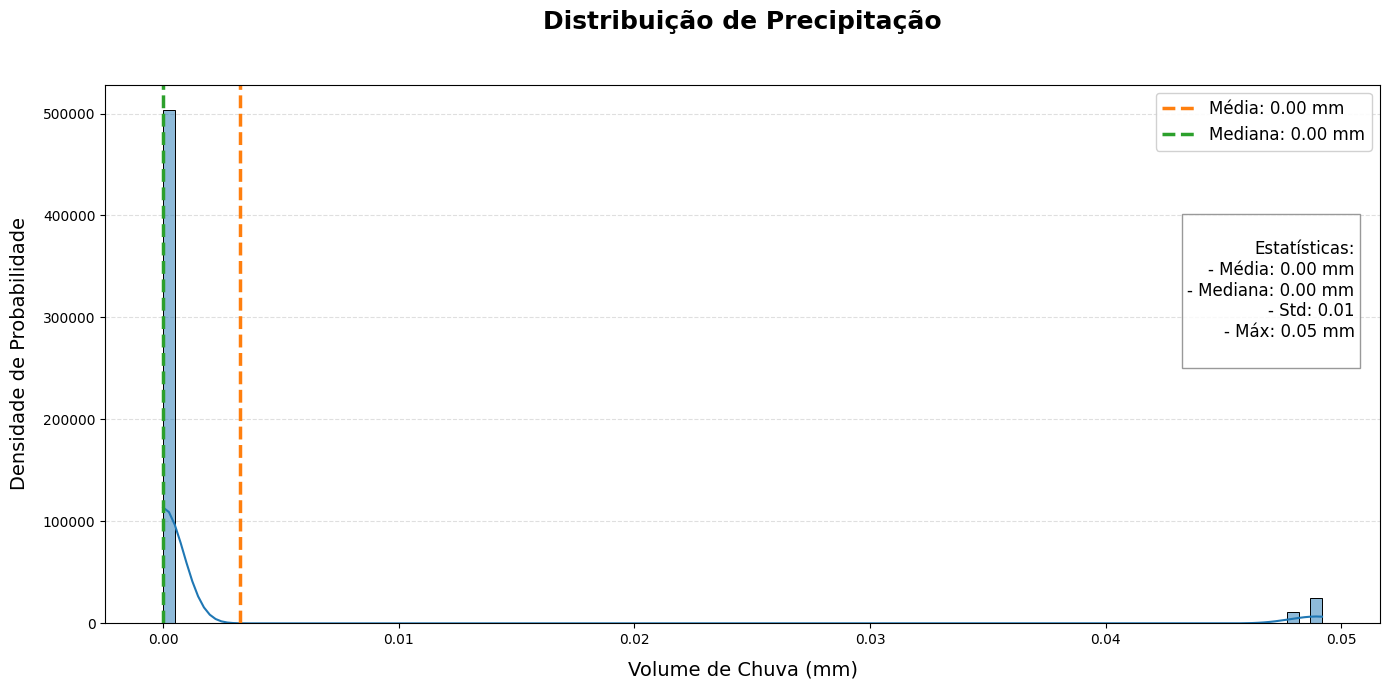

In [163]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='chuva_boxcox',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Precipitação\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Volume de Chuva (mm)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['chuva_boxcox'].mean()
median_val = df_sensor['chuva_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} mm')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} mm')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} mm
- Mediana: {median_val:.2f} mm
- Std: {df_sensor["chuva_boxcox"].std():.2f}
- Máx: {df_sensor["chuva_boxcox"].max():.2f} mm
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

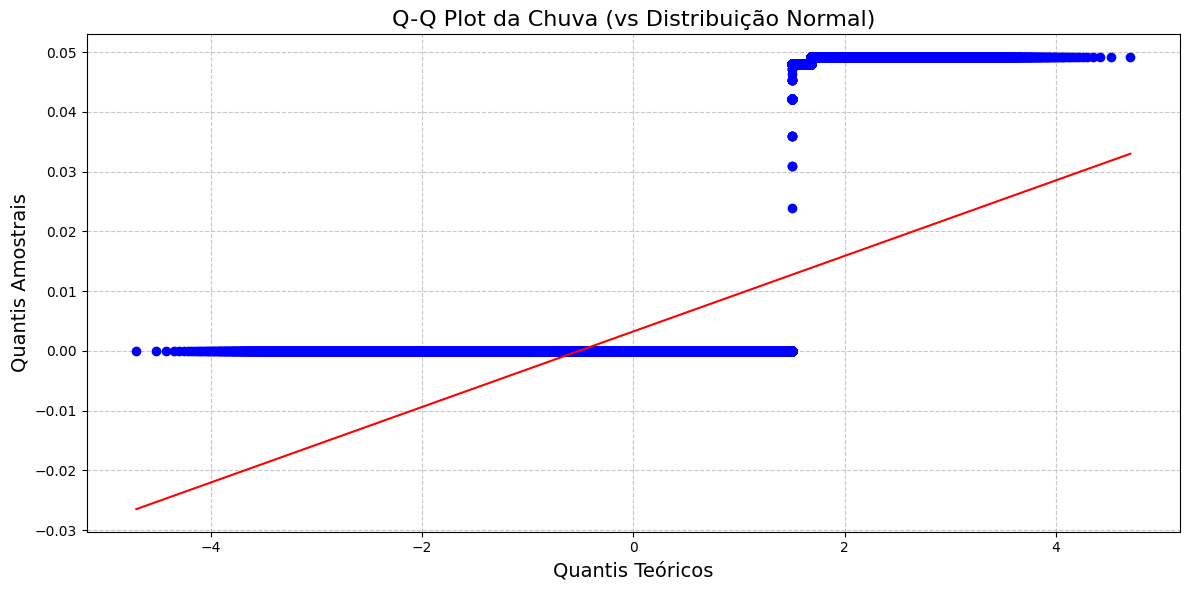

In [164]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['chuva_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Chuva (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna Chuva

In [165]:
#@title Dropando colunas chuva e renomeando 'chuva_boxcox' para chuva

df_sensor.drop(columns=['chuva'], inplace=True)
df_sensor.rename(columns={'chuva_boxcox': 'chuva'}, inplace=True)

## Temperatura

### Análise exploratória

In [166]:
#@title Describe dos dados

df_sensor['temp'].describe()

count    483847.000000
mean         26.174623
std           4.888084
min           0.000000
25%          22.700000
50%          25.600000
75%          29.030000
max          49.080000
Name: temp, dtype: float64

In [167]:
#@title Segundo G1 a menor temperatura do Rio foi 8.1 em 2011
# https://g1.globo.com/rj/rio-de-janeiro/noticia/2024/08/13/rio-bate-recorde-de-frio-do-ano.ghtml

def fill_temp_values(df_sensor):
    df_temp_errada = df_sensor[df_sensor['temp'] < 8.1]
    for index, row in df_temp_errada.iterrows():
        data_formatada = row['data_formatada']
        estacao = row['nome_estacao']
        df_sensor.loc[index, 'temp'] = df_sensor[(df_sensor['data_formatada'] == data_formatada) & (df_sensor['nome_estacao'] == estacao)]['temp'].mean()

    return df_sensor


df_sensor = fill_temp_values(df_sensor)

### Visualização gráfica

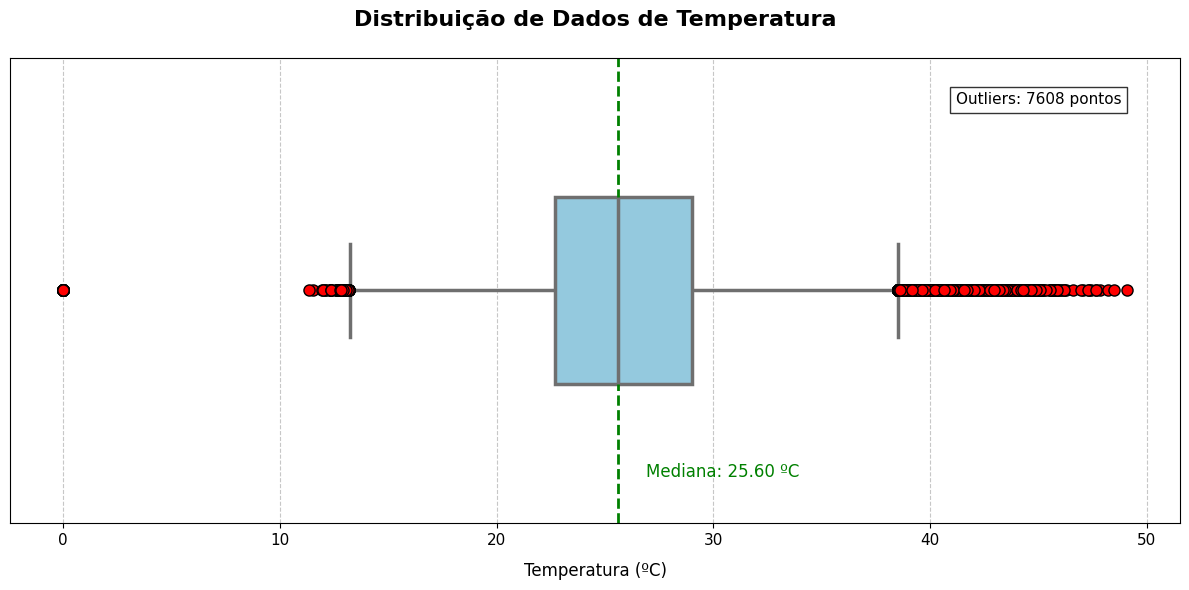

In [168]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['temp'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Temperatura\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Temperatura (ºC)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['temp'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} ºC',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['temp'].quantile(0.25)
q3 = df_sensor['temp'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['temp'] < q1 - 1.5*iqr) |
                            (df_sensor['temp'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

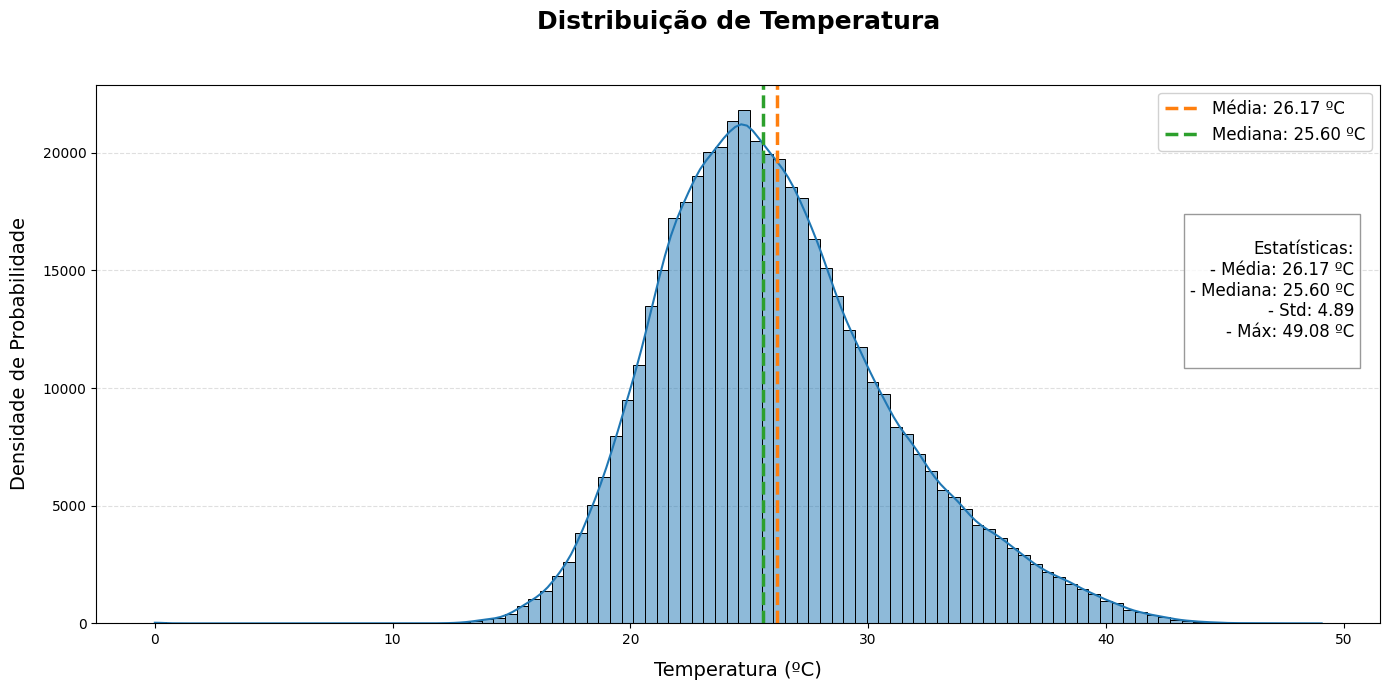

In [169]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='temp',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Temperatura\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Temperatura (ºC)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['temp'].mean()
median_val = df_sensor['temp'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} ºC')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} ºC')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} ºC
- Mediana: {median_val:.2f} ºC
- Std: {df_sensor["temp"].std():.2f}
- Máx: {df_sensor["temp"].max():.2f} ºC
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [170]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['temp'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'temp'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'temp'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'temp'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para temp: Estatística = 0.971, p-valor = 0.000
temp NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 2.440002735359698e-13


In [171]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.069, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 0.0001347762540639558


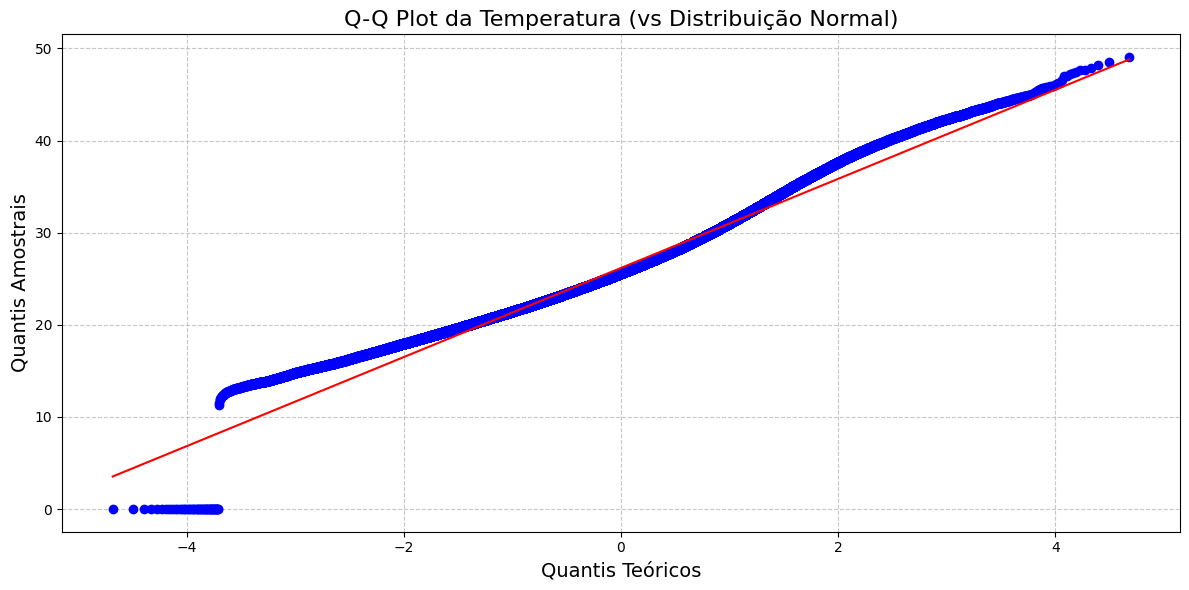

In [172]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['temp'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Temperatura (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [173]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['temp_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['temp'].notna()
# temp_validos = df_sensor.loc[mask, 'temp']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'temp_boxcox'] = boxcox1p(temp_validos, lambda_boxcox)

In [174]:
df_sensor['temp_boxcox'] = np.nan

mask = (df_sensor['temp'].notna())

temp_validos = df_sensor.loc[mask, 'temp']

temp_boxcox, lambda_boxcox = stats.boxcox(temp_validos + 1)

df_sensor.loc[mask, 'temp_boxcox'] = temp_boxcox

### Testes de normalidade após Boxcox



In [175]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['temp_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'temp'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'temp'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'temp'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para temp: Estatística = 0.989, p-valor = 0.000
temp NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 1.0354719841738672e-06


In [176]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.044, p-valor = 0.040
A amostra NÃO segue uma distribuição normal.
p_value gerado: 0.04013367598590989


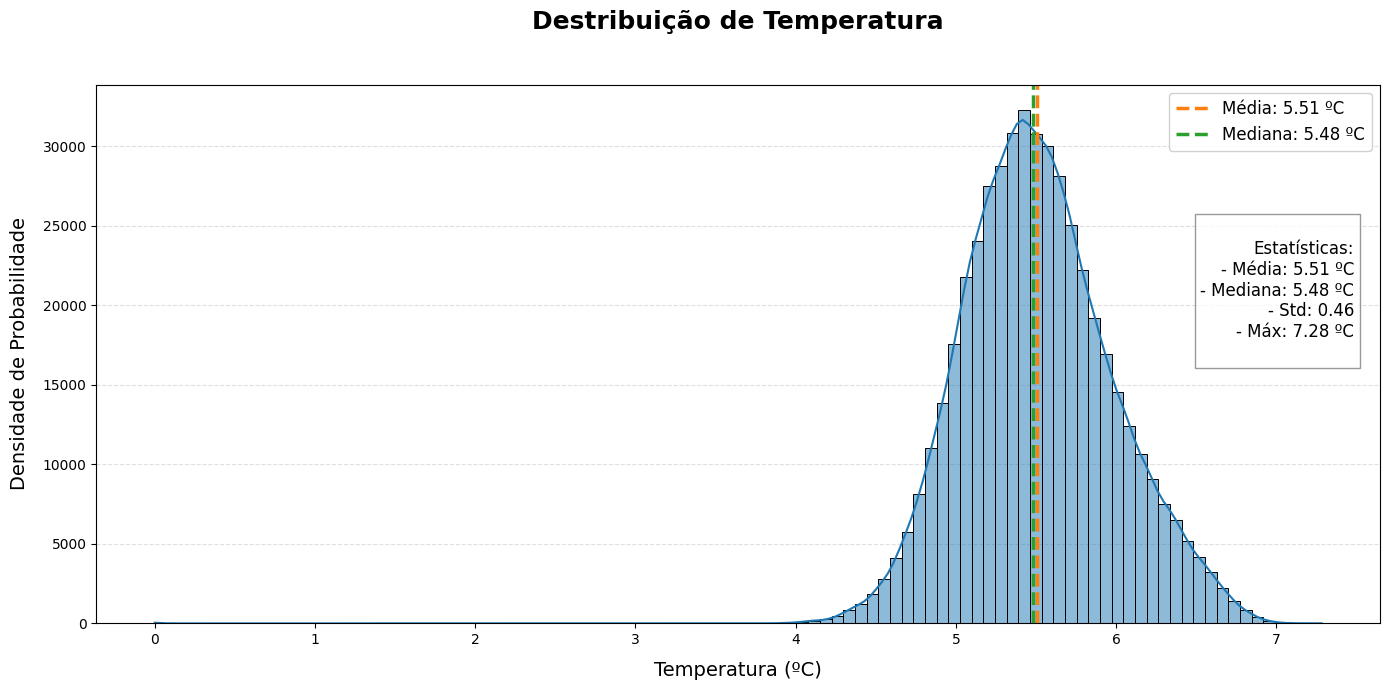

In [177]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='temp_boxcox',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Destribuição de Temperatura\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Temperatura (ºC)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['temp_boxcox'].mean()
median_val = df_sensor['temp_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} ºC')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} ºC')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} ºC
- Mediana: {median_val:.2f} ºC
- Std: {df_sensor["temp_boxcox"].std():.2f}
- Máx: {df_sensor["temp_boxcox"].max():.2f} ºC
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

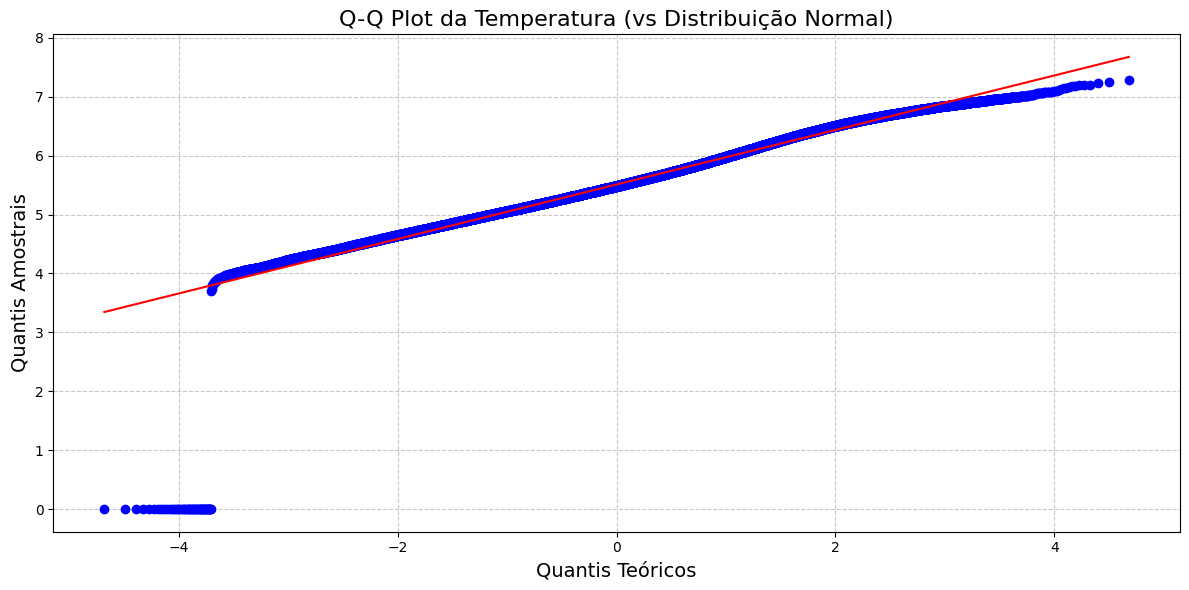

In [178]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['temp_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Temperatura (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna Chuva

In [179]:
#@title Dropando colunas temp e renomeando 'temp_boxcox' para temp

df_sensor.drop(columns=['temp'], inplace=True)
df_sensor.rename(columns={'temp_boxcox': 'temp'}, inplace=True)

## Umidade Relativa do Ar

### Análise exploratória

In [180]:
#@title Describe dos dados

df_sensor['ur'].describe()

count    452423.000000
mean         70.219271
std          18.078340
min           0.000000
25%          57.980000
50%          72.090000
75%          84.080000
max         100.000000
Name: ur, dtype: float64

In [181]:
#@title Segundo CNN a menor umidade relativa do Rio foi 10.3 em 2024
# https://www.cnnbrasil.com.br/nacional/rio-tem-calor-de-41-graus-e-pouca-umidade-relativa-do-ar/

def fill_ur_values(df_sensor):
    df_ur_errada = df_sensor[df_sensor['ur'] < 10.3]
    for index, row in df_ur_errada.iterrows():
        data_formatada = row['data_formatada']
        estacao = row['nome_estacao']
        df_sensor.loc[index, 'ur'] = df_sensor[(df_sensor['data_formatada'] == data_formatada) & (df_sensor['nome_estacao'] == estacao)]['ur'].mean()

    return df_sensor


df_sensor = fill_ur_values(df_sensor)

### Visualização gráfica

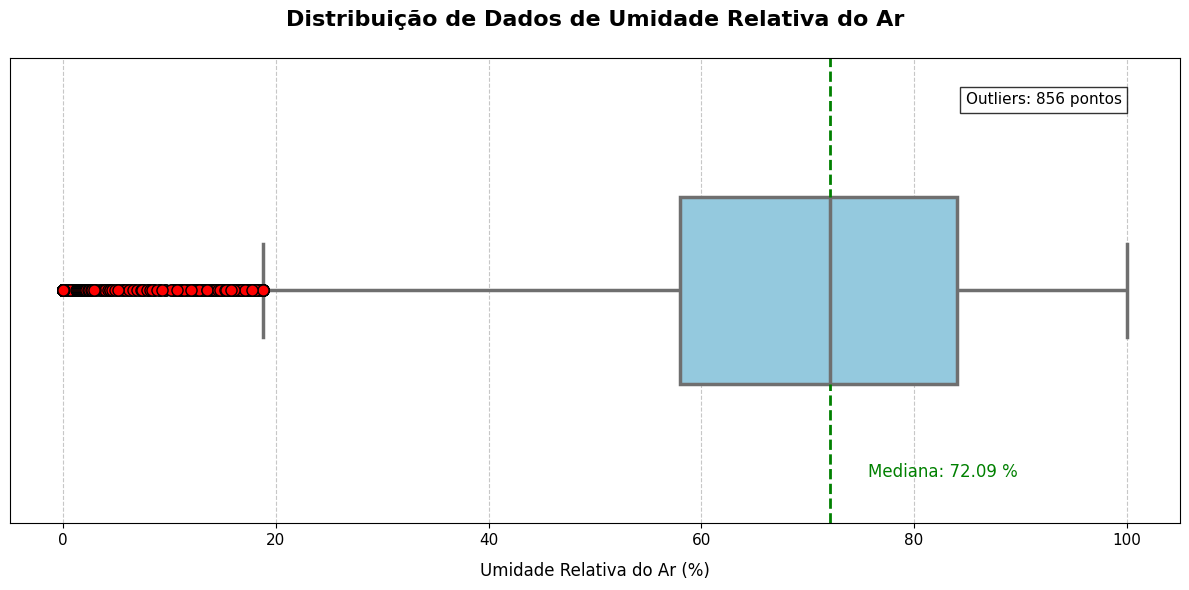

In [182]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['ur'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Umidade Relativa do Ar\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Umidade Relativa do Ar (%)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['ur'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} %',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['ur'].quantile(0.25)
q3 = df_sensor['ur'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['ur'] < q1 - 1.5*iqr) |
                            (df_sensor['ur'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

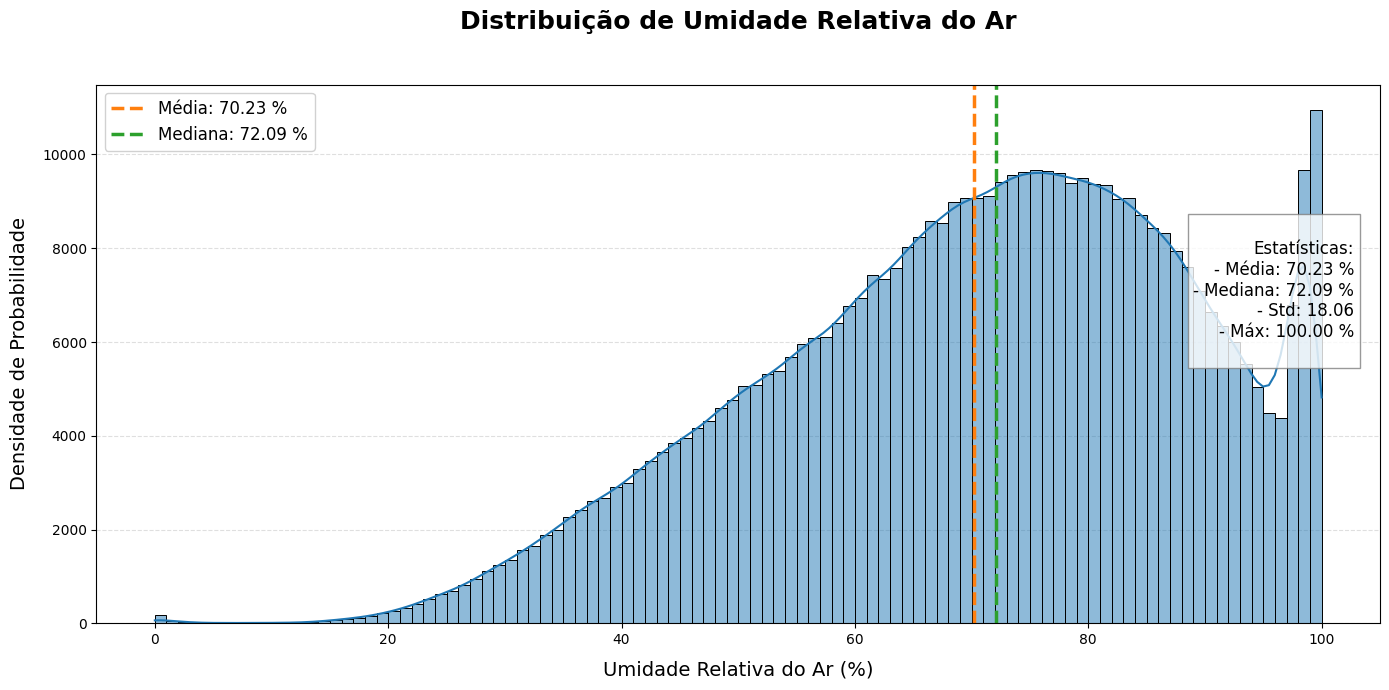

In [183]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='ur',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Umidade Relativa do Ar\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Umidade Relativa do Ar (%)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['ur'].mean()
median_val = df_sensor['ur'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} %')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} %')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} %
- Mediana: {median_val:.2f} %
- Std: {df_sensor["ur"].std():.2f}
- Máx: {df_sensor["ur"].max():.2f} %
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [184]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['ur'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'ur'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'ur'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'ur'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para ur: Estatística = 0.971, p-valor = 0.000
ur NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 4.0364273627943745e-13


In [185]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.054, p-valor = 0.005
A amostra NÃO segue uma distribuição normal.
p_value gerado: 0.005393419095213592


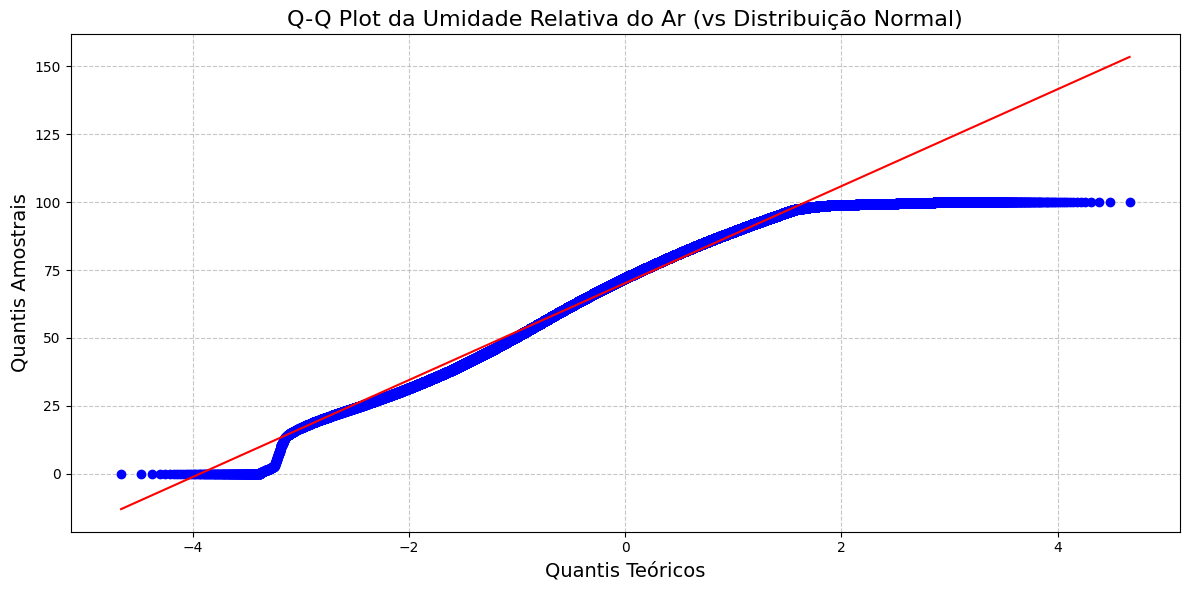

In [186]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['ur'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Umidade Relativa do Ar (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [187]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['ur_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['ur'].notna()
# ur_validos = df_sensor.loc[mask, 'ur']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'ur_boxcox'] = boxcox1p(ur_validos, lambda_boxcox)

In [188]:
df_sensor['ur_boxcox'] = np.nan

mask = (df_sensor['ur'].notna())

ur_validos = df_sensor.loc[mask, 'ur']

ur_boxcox, lambda_boxcox = stats.boxcox(ur_validos + 1)

df_sensor.loc[mask, 'ur_boxcox'] = ur_boxcox

### Testes de normalidade após Boxcox



In [189]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['ur_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'ur'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'ur'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'ur'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para ur: Estatística = 0.979, p-valor = 0.000
ur NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 9.2099362414786e-11


In [190]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.043, p-valor = 0.051
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.05071272756068723


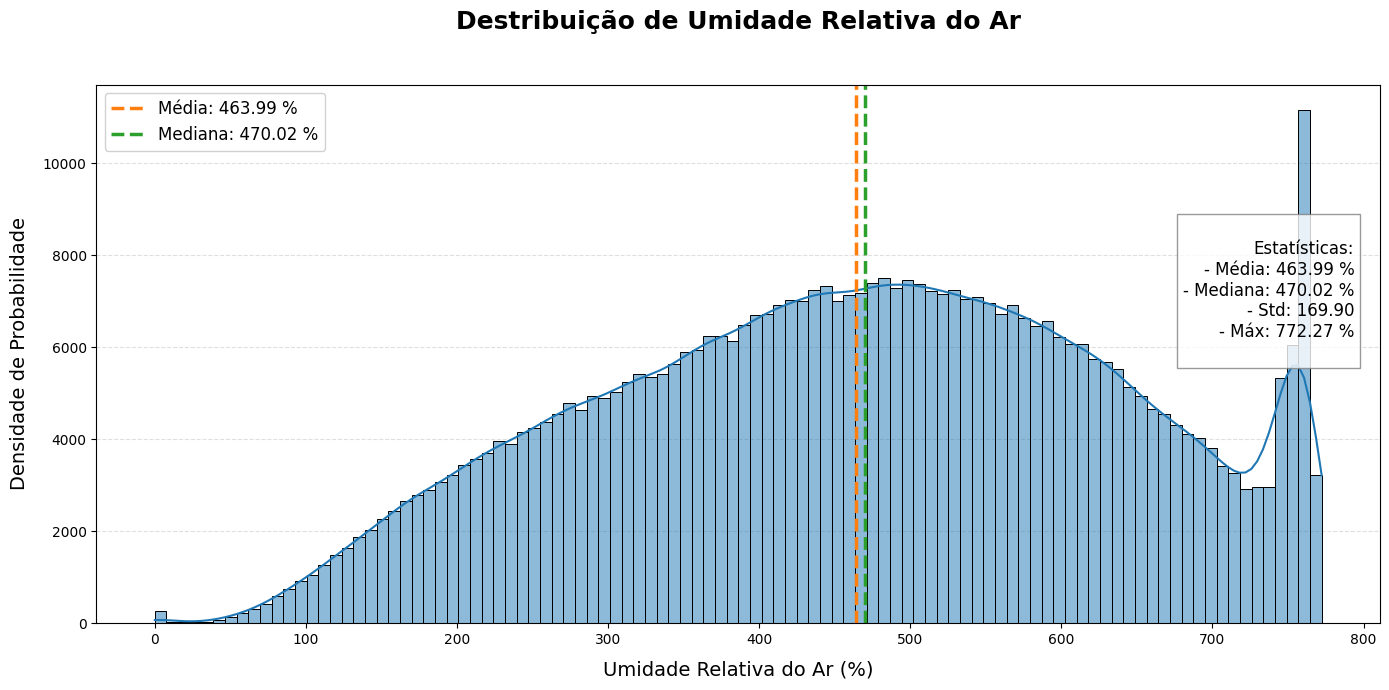

In [191]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='ur_boxcox',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Destribuição de Umidade Relativa do Ar\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Umidade Relativa do Ar (%)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['ur_boxcox'].mean()
median_val = df_sensor['ur_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} %')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} %')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} %
- Mediana: {median_val:.2f} %
- Std: {df_sensor["ur_boxcox"].std():.2f}
- Máx: {df_sensor["ur_boxcox"].max():.2f} %
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

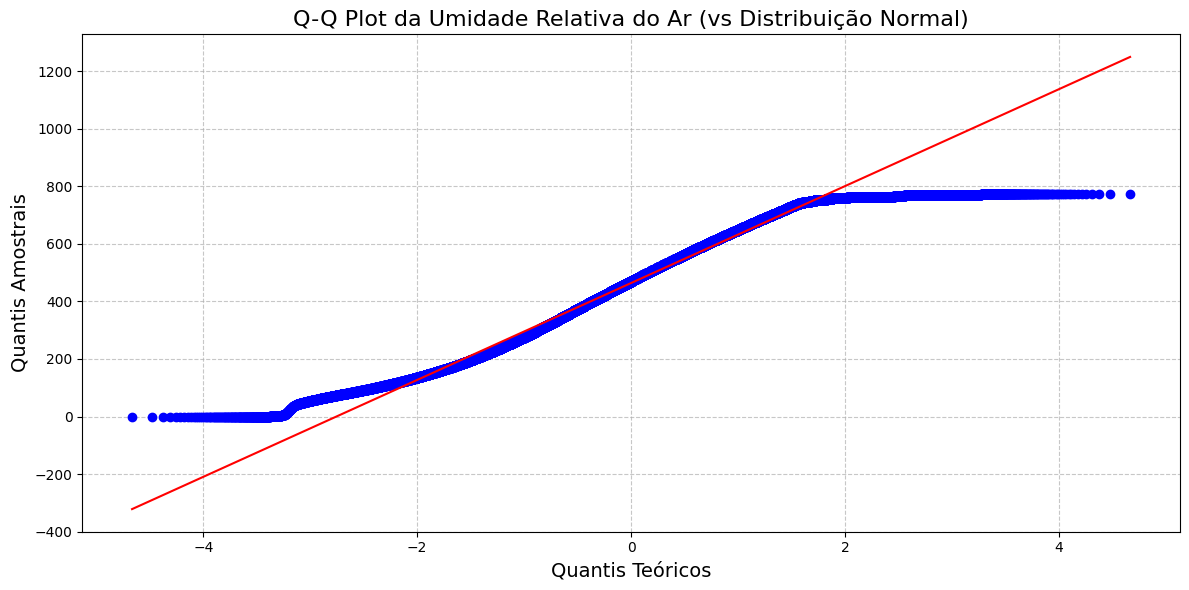

In [192]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['ur_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Umidade Relativa do Ar (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna ur

In [193]:
#@title Dropando colunas ur e renomeando 'ur_boxcox' para ur

df_sensor.drop(columns=['ur'], inplace=True)
df_sensor.rename(columns={'ur_boxcox': 'ur'}, inplace=True)

## Monóxido de Carbono

### Análise exploratória

In [194]:
#@title Describe dos dados

df_sensor['co'].describe()

count    462397.000000
mean          0.347157
std           0.282820
min           0.000000
25%           0.150000
50%           0.300000
75%           0.470000
max          12.080000
Name: co, dtype: float64

### Visualização gráfica

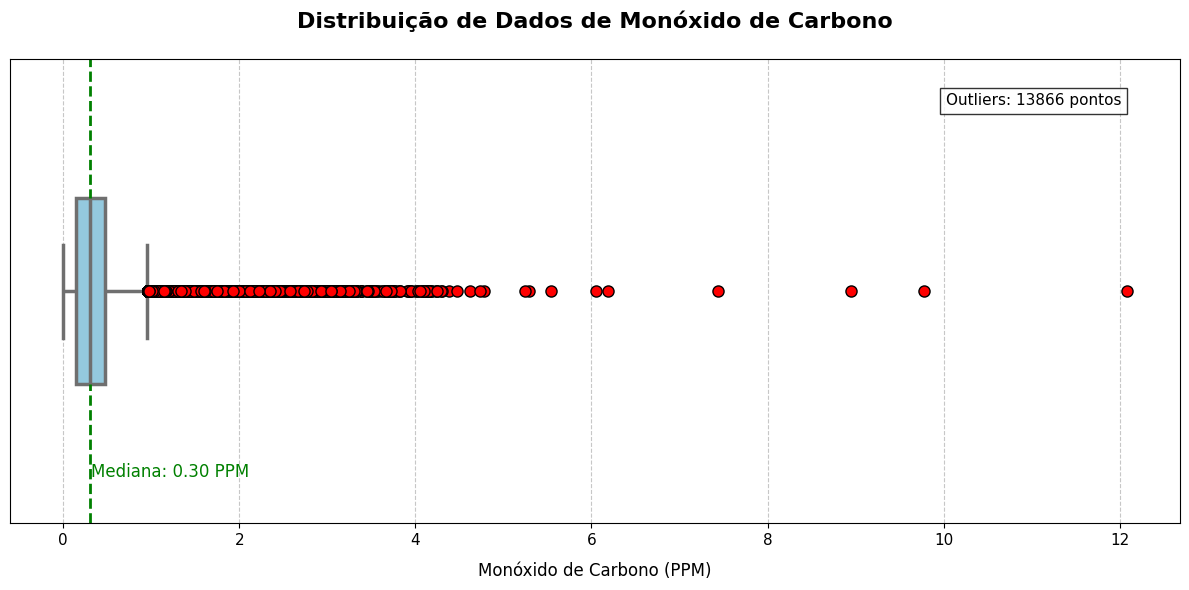

In [195]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['co'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Monóxido de Carbono\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Monóxido de Carbono (PPM)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['co'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} PPM',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['co'].quantile(0.25)
q3 = df_sensor['co'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['co'] < q1 - 1.5*iqr) |
                            (df_sensor['co'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

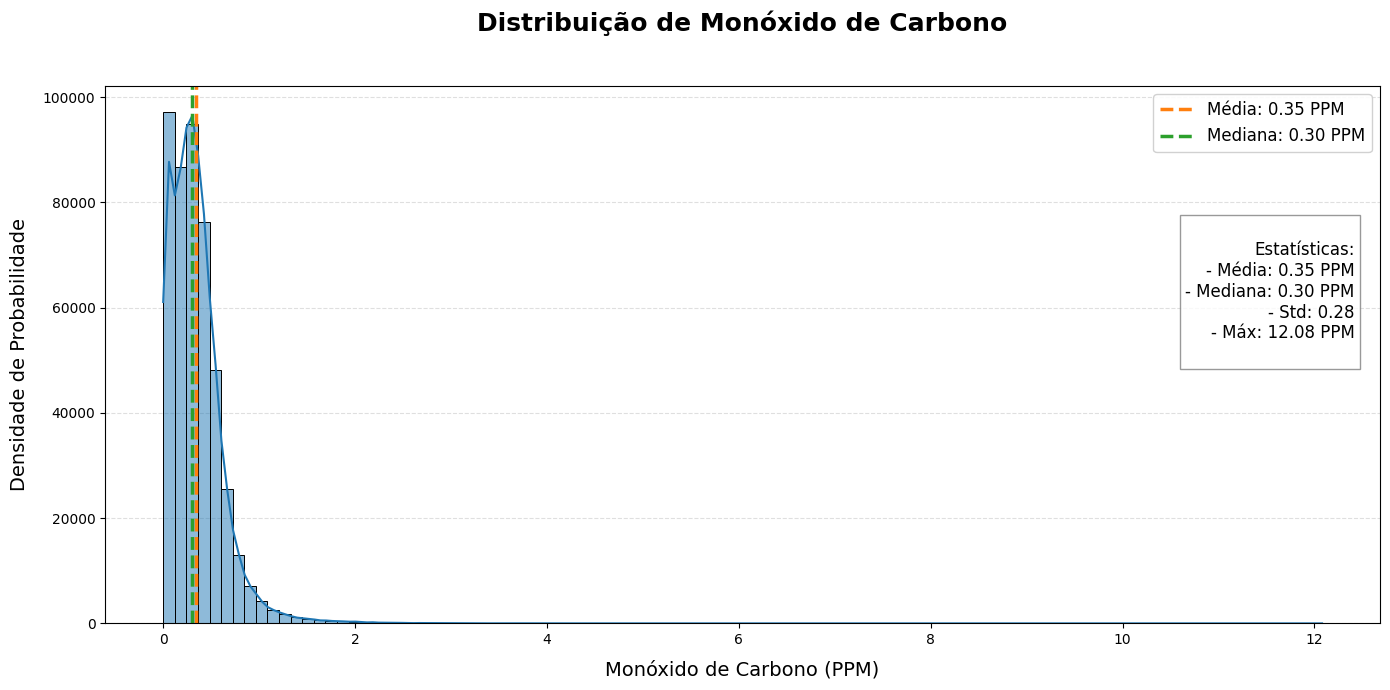

In [196]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='co',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Monóxido de Carbono\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Monóxido de Carbono (PPM)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['co'].mean()
median_val = df_sensor['co'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} PPM')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} PPM')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} PPM
- Mediana: {median_val:.2f} PPM
- Std: {df_sensor['co'].std():.2f}
- Máx: {df_sensor['co'].max():.2f} PPM
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [197]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['co'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'co'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'co'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'co'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para co: Estatística = 0.870, p-valor = 0.000
co NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 4.847674611736247e-28


In [198]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.111, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 3.7431730605580016e-11


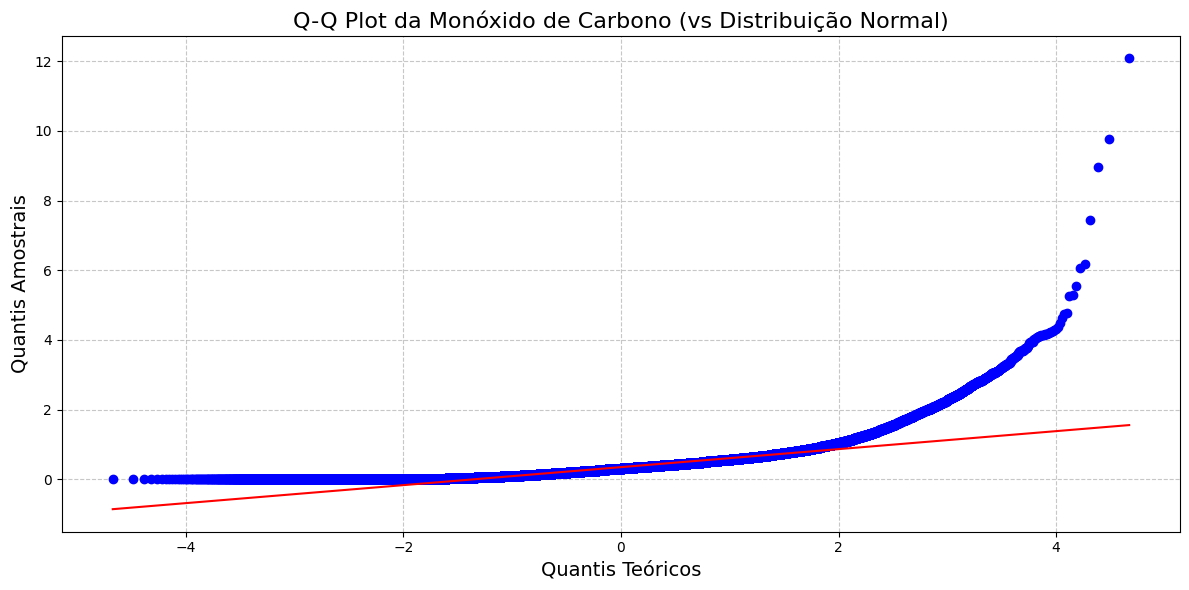

In [199]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['co'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Monóxido de Carbono (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [200]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [201]:
df_sensor['co_boxcox'] = np.nan

mask = (df_sensor['co'].notna())

co_validos = df_sensor.loc[mask, 'co']

co_boxcox, lambda_boxcox = stats.boxcox(co_validos + 1)

df_sensor.loc[mask, 'co_boxcox'] = co_boxcox

### Testes de normalidade após Boxcox



In [202]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['co_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'co'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'co'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'co'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para co: Estatística = 0.988, p-valor = 0.000
co NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 2.44860861253955e-07


In [203]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.043, p-valor = 0.047
A amostra NÃO segue uma distribuição normal.
p_value gerado: 0.0474793929030658


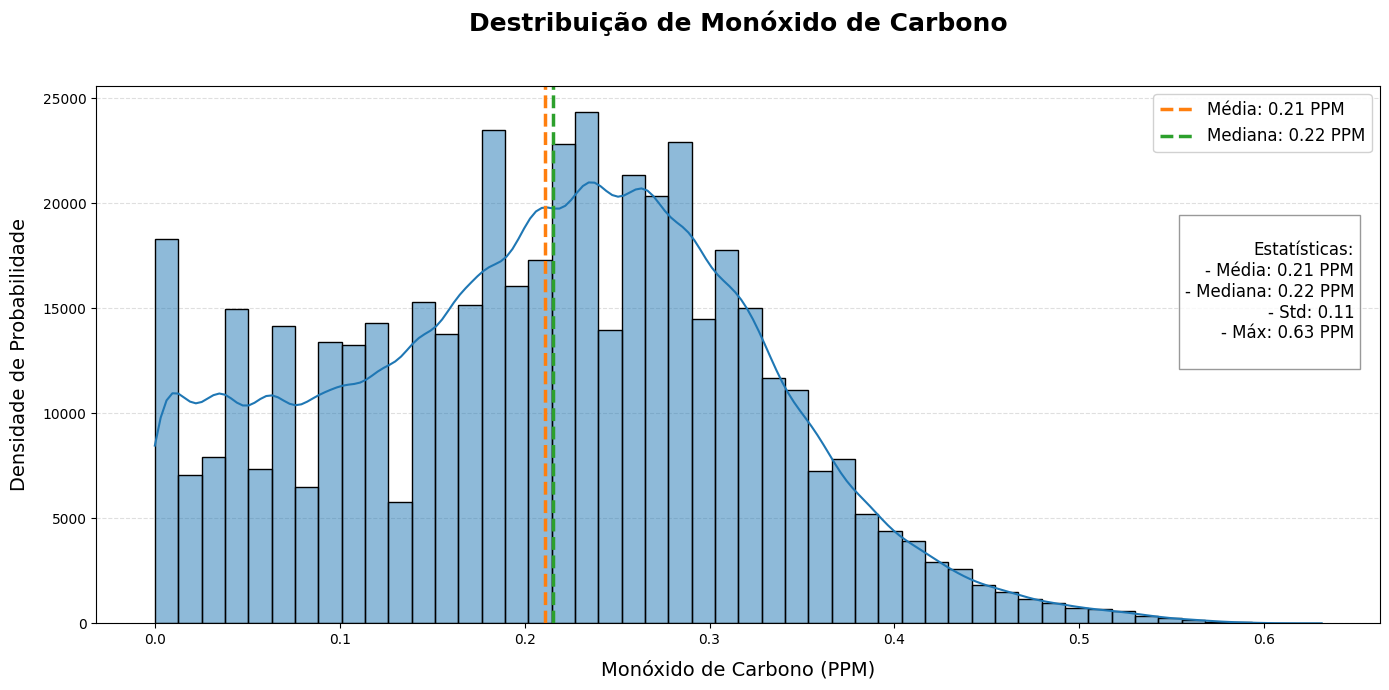

In [204]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='co_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Monóxido de Carbono\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Monóxido de Carbono (PPM)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['co_boxcox'].mean()
median_val = df_sensor['co_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} PPM')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} PPM')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} PPM
- Mediana: {median_val:.2f} PPM
- Std: {df_sensor["co_boxcox"].std():.2f}
- Máx: {df_sensor["co_boxcox"].max():.2f} PPM
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

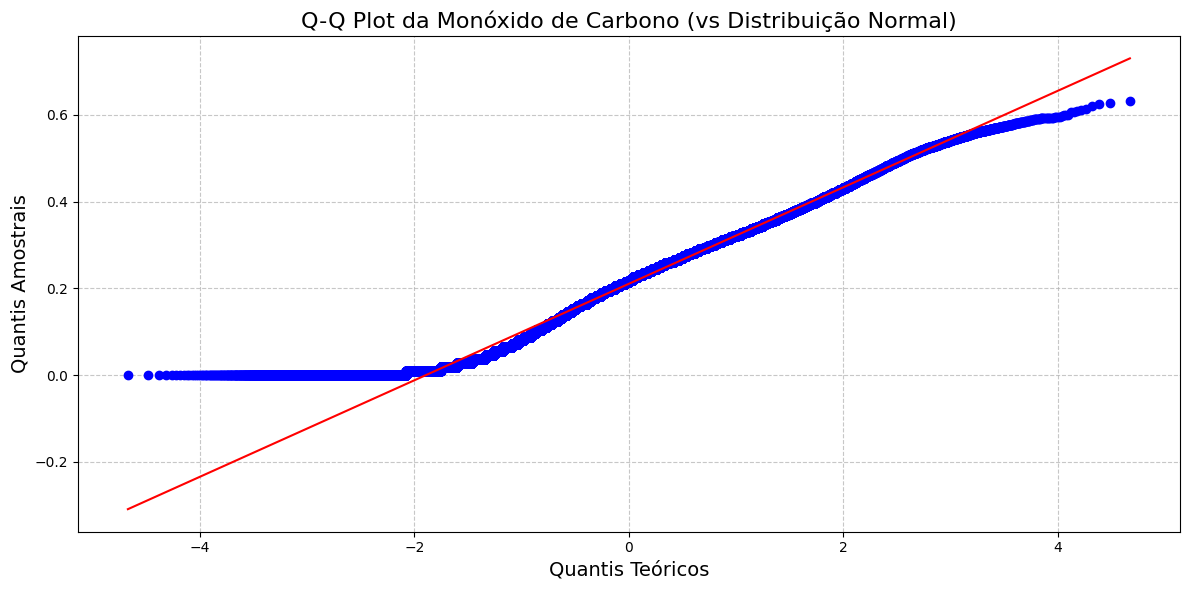

In [205]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['co_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Monóxido de Carbono (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna ur

In [206]:
#@title Dropando colunas co e renomeando 'co_boxcox' para co

df_sensor.drop(columns=['co'], inplace=True)
df_sensor.rename(columns={'co_boxcox': 'co'}, inplace=True)

## Monóxido de Nitrogênio

### Análise exploratória

In [207]:
#@title Describe dos dados

df_sensor['no'].describe()

count    249897.000000
mean         19.862852
std          29.640819
min           0.000000
25%           2.980000
50%           8.220000
75%          24.950000
max         640.380000
Name: no, dtype: float64

### Visualização gráfica

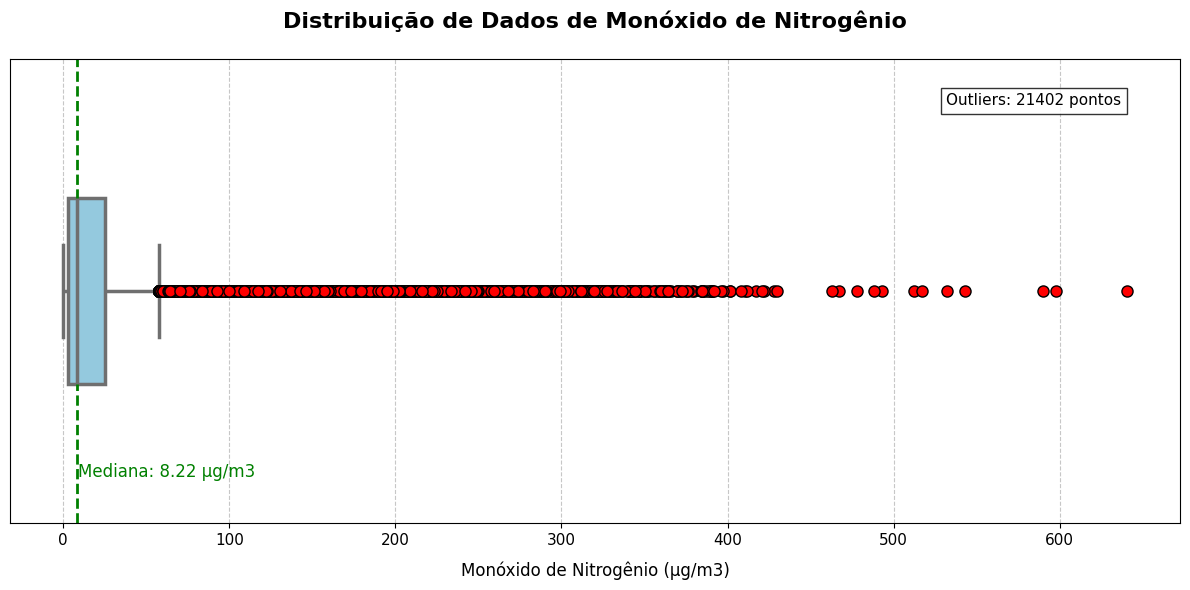

In [208]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['no'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Monóxido de Nitrogênio\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Monóxido de Nitrogênio (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['no'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['no'].quantile(0.25)
q3 = df_sensor['no'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['no'] < q1 - 1.5*iqr) |
                            (df_sensor['no'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

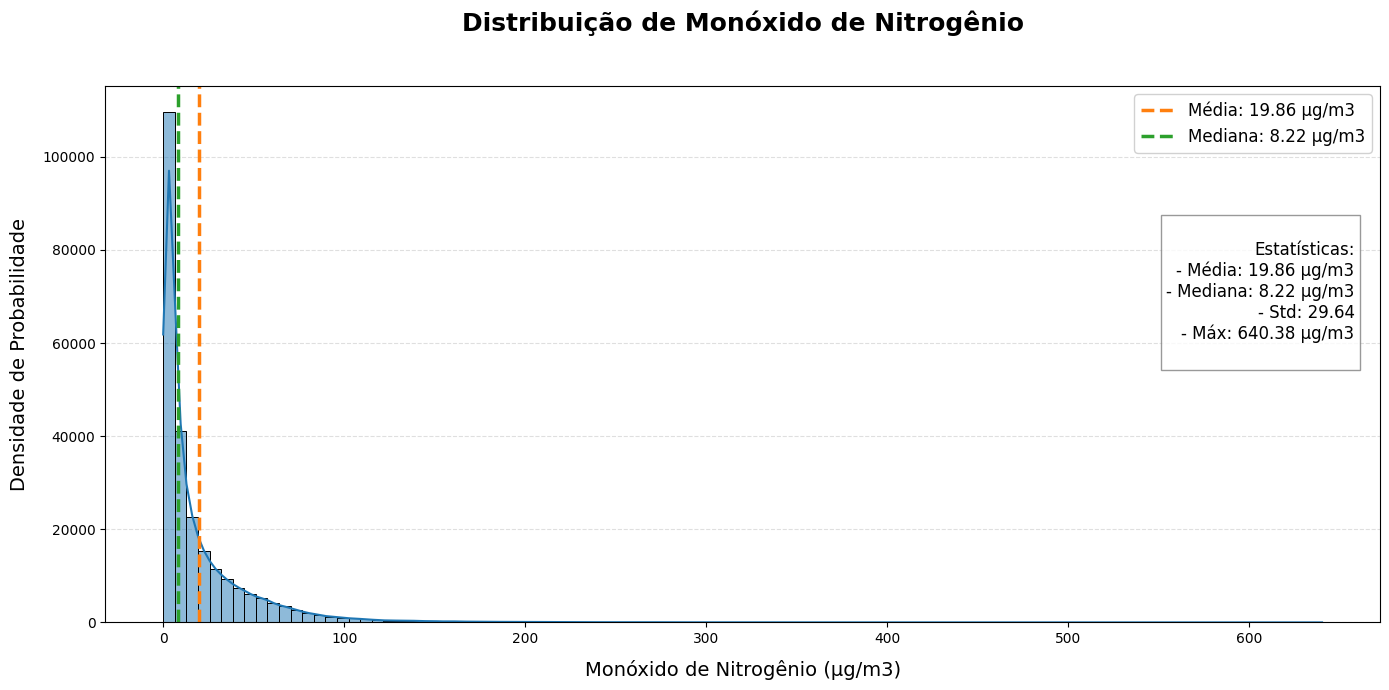

In [209]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='no',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Monóxido de Nitrogênio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Monóxido de Nitrogênio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['no'].mean()
median_val = df_sensor['no'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['no'].std():.2f}
- Máx: {df_sensor['no'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [210]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['no'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'no'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'no'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'no'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para no: Estatística = 0.657, p-valor = 0.000
no NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 9.302237151980443e-41


In [211]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.248, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 1.1402669172814037e-54


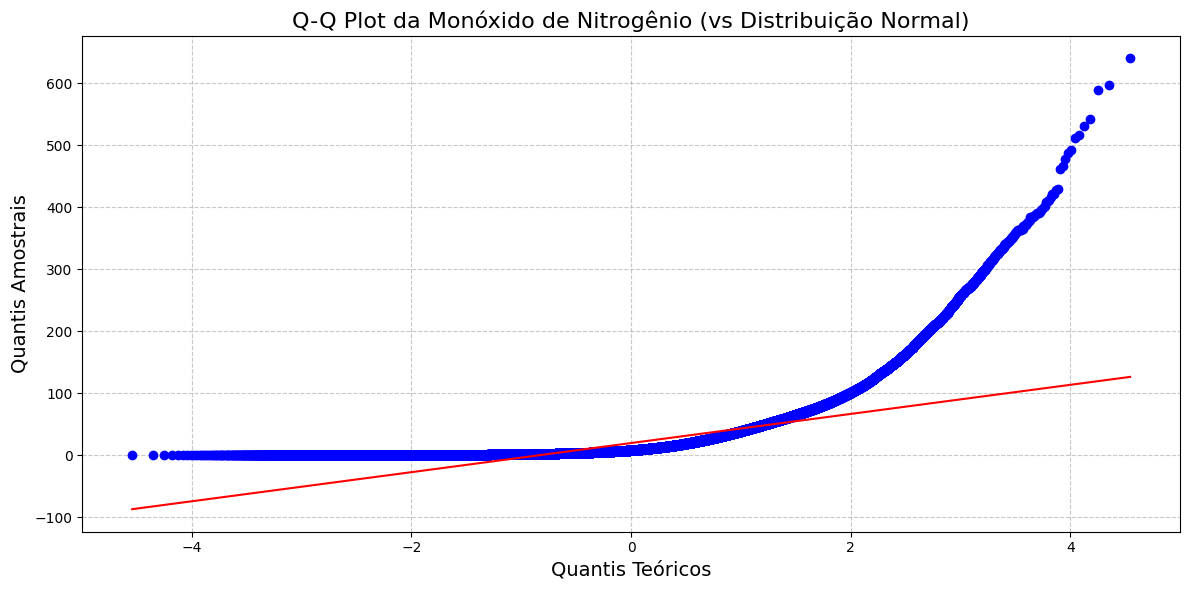

In [212]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['no'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Monóxido de Nitrogênio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [213]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [214]:
df_sensor['no_boxcox'] = np.nan

mask = (df_sensor['no'].notna())

no_validos = df_sensor.loc[mask, 'no']

no_boxcox, lambda_boxcox = stats.boxcox(no_validos + 1)

df_sensor.loc[mask, 'no_boxcox'] = no_boxcox

### Testes de normalidade após Boxcox



In [215]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['no_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'no'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'no'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'no'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para no: Estatística = 0.979, p-valor = 0.000
no NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 7.757440925781507e-11


In [216]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.052, p-valor = 0.008
A amostra NÃO segue uma distribuição normal.
p_value gerado: 0.008460058864138982


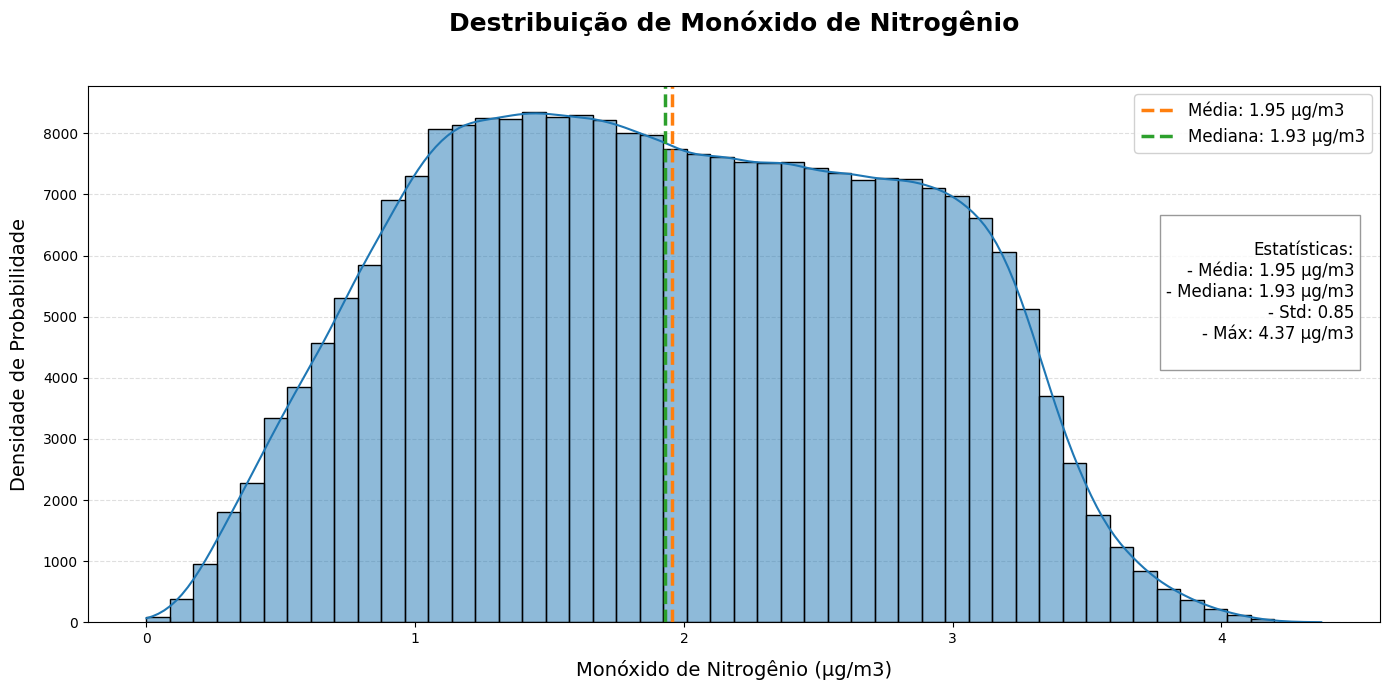

In [217]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='no_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Monóxido de Nitrogênio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Monóxido de Nitrogênio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['no_boxcox'].mean()
median_val = df_sensor['no_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["no_boxcox"].std():.2f}
- Máx: {df_sensor["no_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

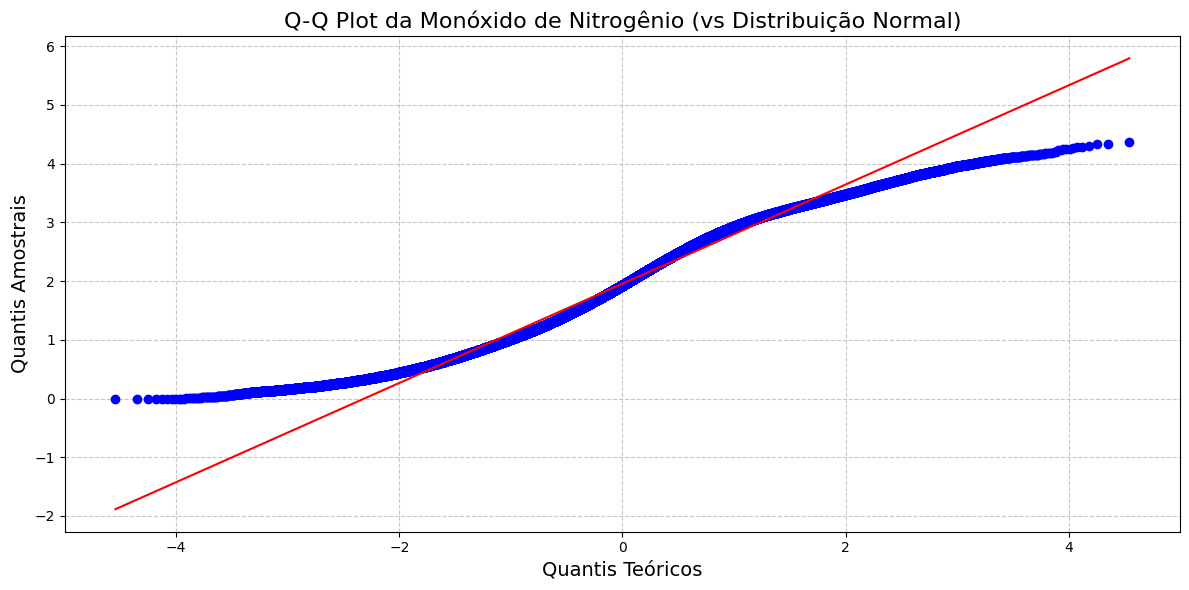

In [218]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['no_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Monóxido de Nitrogênio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna ur

In [219]:
#@title Dropando colunas no e renomeando 'no_boxcox' para no

df_sensor.drop(columns=['no'], inplace=True)
df_sensor.rename(columns={'no_boxcox': 'no'}, inplace=True)

## Dióxido de Nitrogênio

### Análise exploratória

In [220]:
#@title Describe dos dados

df_sensor['no2'].describe()

count    249708.000000
mean         34.325703
std          20.564568
min           0.000000
25%          19.370000
50%          30.630000
75%          44.910000
max         235.930000
Name: no2, dtype: float64

### Visualização gráfica

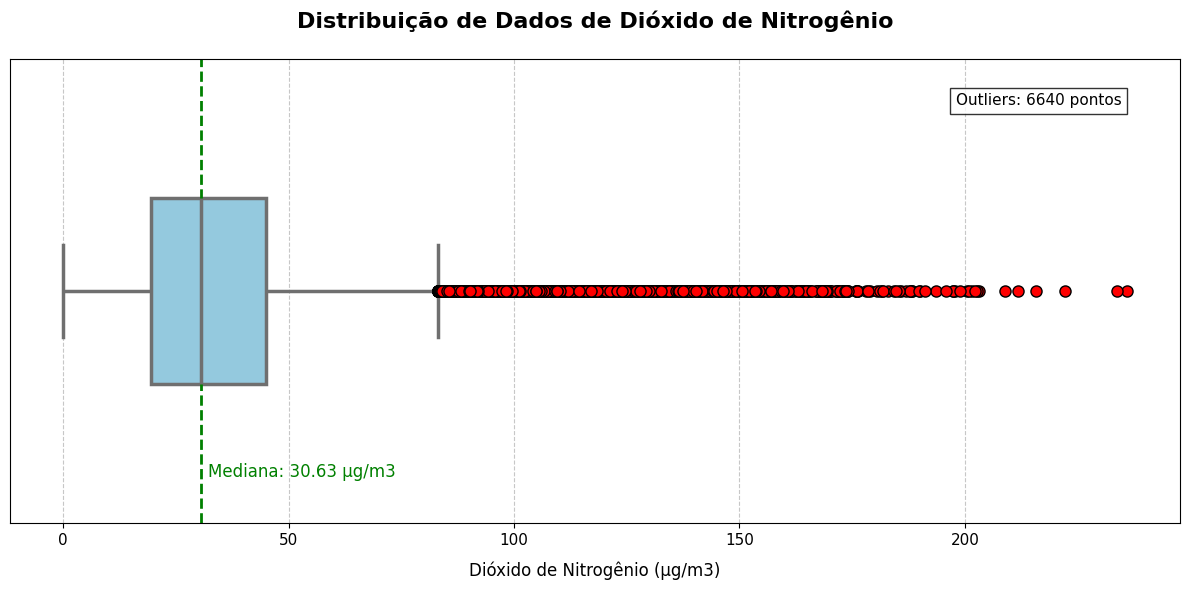

In [221]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['no2'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Dióxido de Nitrogênio\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Dióxido de Nitrogênio (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['no2'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['no2'].quantile(0.25)
q3 = df_sensor['no2'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['no2'] < q1 - 1.5*iqr) |
                            (df_sensor['no2'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

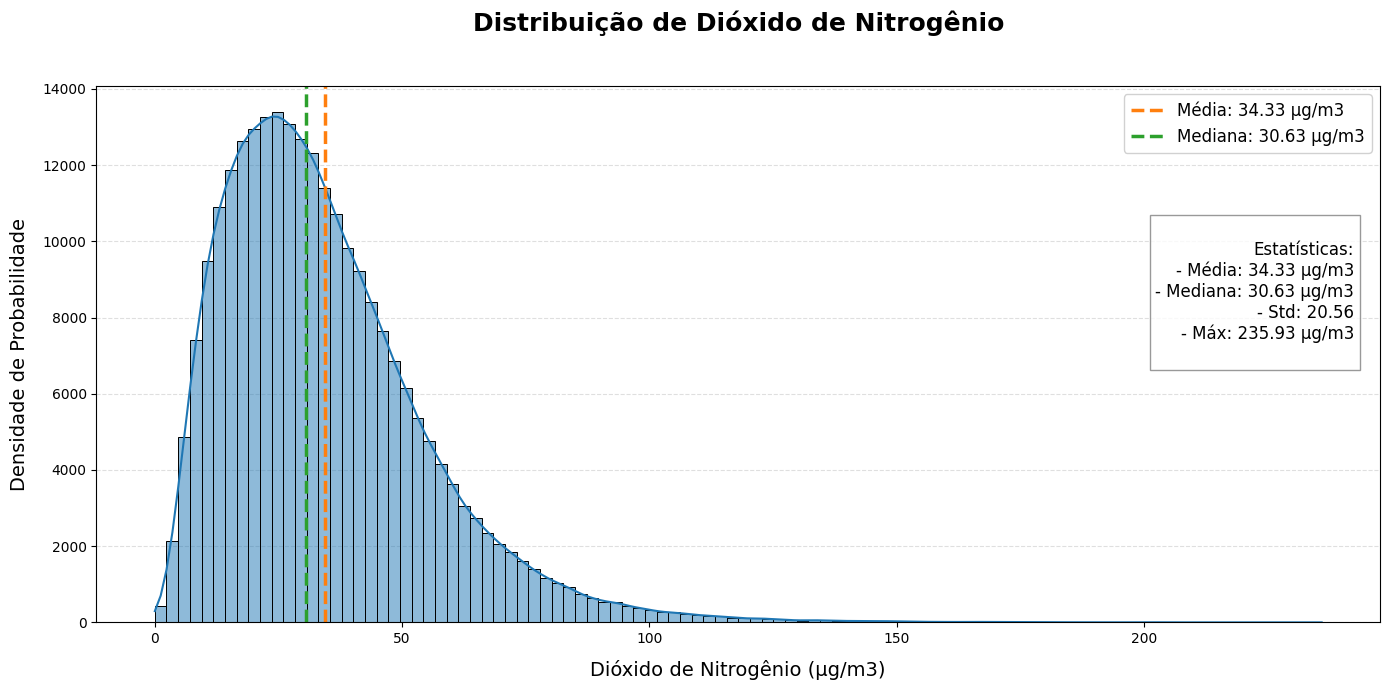

In [222]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='no2',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Dióxido de Nitrogênio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Dióxido de Nitrogênio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['no2'].mean()
median_val = df_sensor['no2'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['no2'].std():.2f}
- Máx: {df_sensor['no2'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [223]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['no2'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'no2'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'no2'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'no2'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para no2: Estatística = 0.872, p-valor = 0.000
no2 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 7.894143344640655e-28


In [224]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.087, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 4.498094972851665e-07


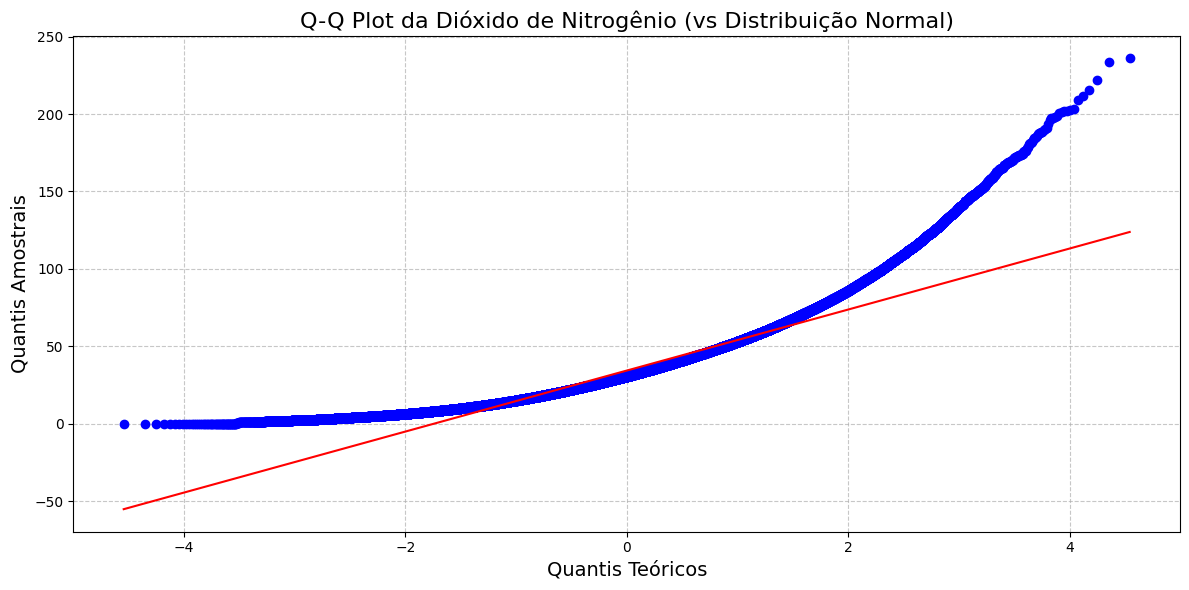

In [225]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['no2'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Dióxido de Nitrogênio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [226]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [227]:
df_sensor['no2_boxcox'] = np.nan

mask = (df_sensor['no2'].notna())

no2_validos = df_sensor.loc[mask, 'no2']

no2_boxcox, lambda_boxcox = stats.boxcox(no2_validos + 1)

df_sensor.loc[mask, 'no2_boxcox'] = no2_boxcox

### Testes de normalidade após Boxcox



In [228]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['no2_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'no2'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'no2'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'no2'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para no2: Estatística = 0.996, p-valor = 0.006
no2 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 0.005873227834374212


In [229]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.029, p-valor = 0.377
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.37714266810482466


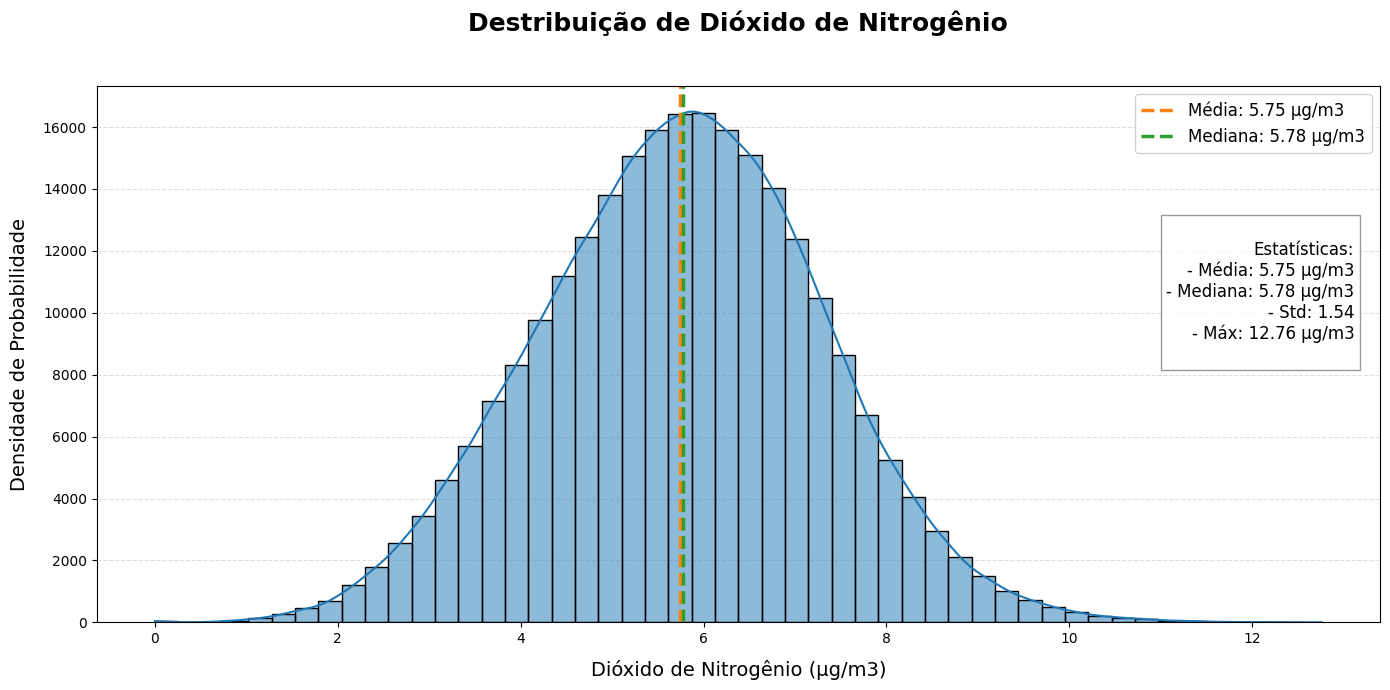

In [230]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='no2_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Dióxido de Nitrogênio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Dióxido de Nitrogênio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['no2_boxcox'].mean()
median_val = df_sensor['no2_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["no2_boxcox"].std():.2f}
- Máx: {df_sensor["no2_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

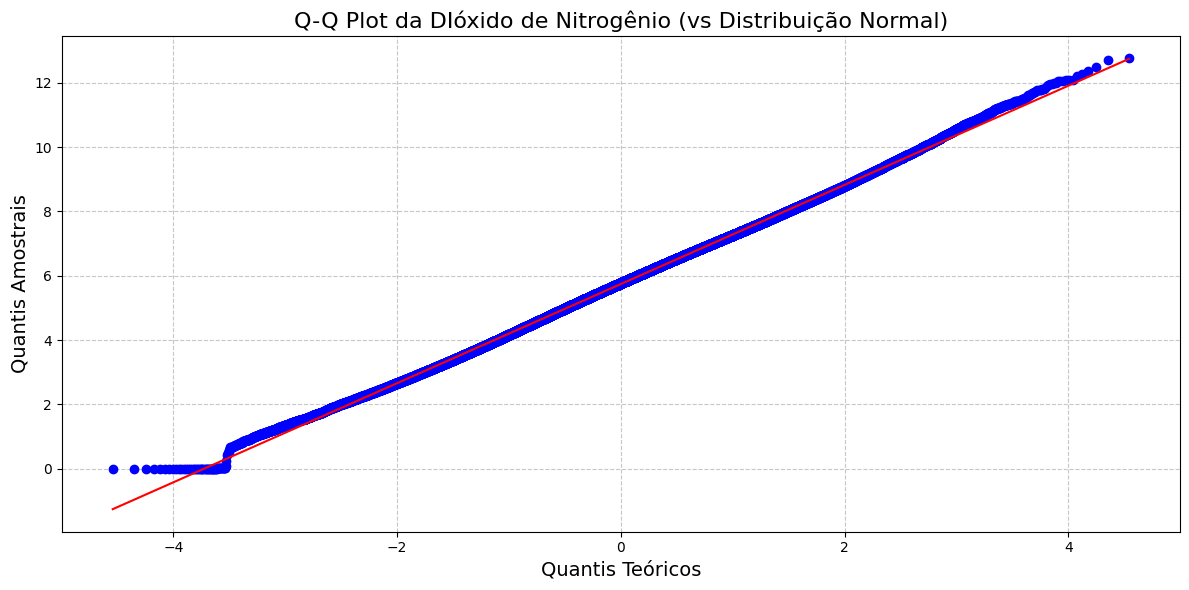

In [231]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['no2_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da DIóxido de Nitrogênio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna ur

In [232]:
#@title Dropando colunas no2 e renomeando 'no2_boxcox' para no2

df_sensor.drop(columns=['no2'], inplace=True)
df_sensor.rename(columns={'no2_boxcox': 'no2'}, inplace=True)

## Óxido de Nitrogênio

### Análise exploratória

In [233]:
#@title Describe dos dados

df_sensor['nox'].describe()

count    249691.000000
mean         50.166078
std          40.803106
min           0.000000
25%          23.690000
50%          39.400000
75%          63.860000
max         702.670000
Name: nox, dtype: float64

### Visualização gráfica

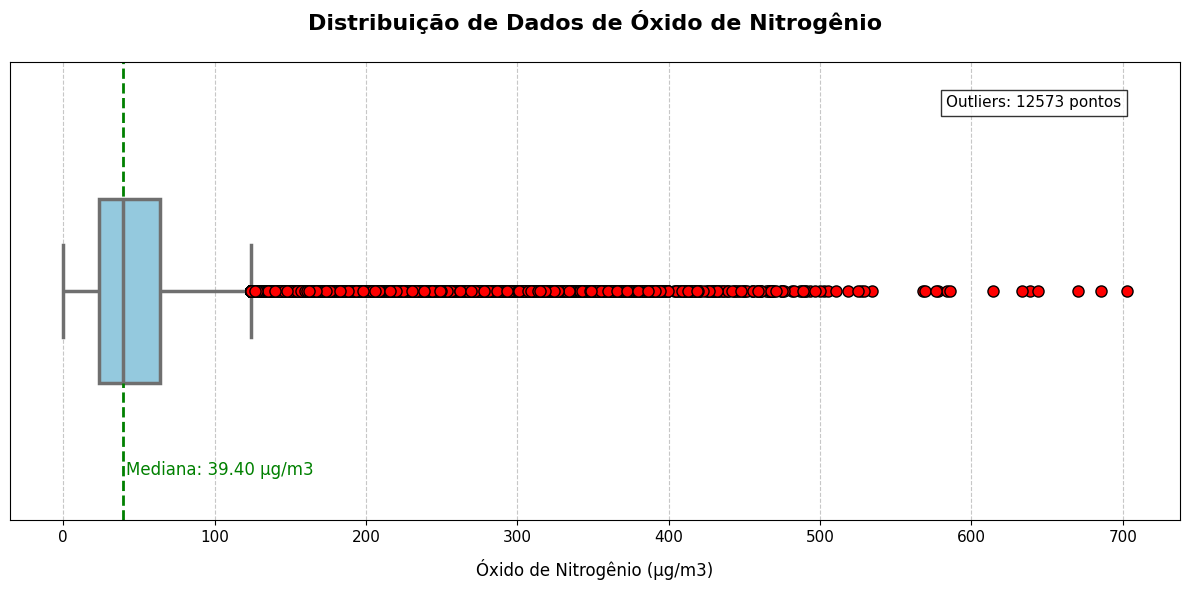

In [234]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['nox'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Óxido de Nitrogênio\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Óxido de Nitrogênio (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['nox'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['nox'].quantile(0.25)
q3 = df_sensor['nox'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['nox'] < q1 - 1.5*iqr) |
                            (df_sensor['nox'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

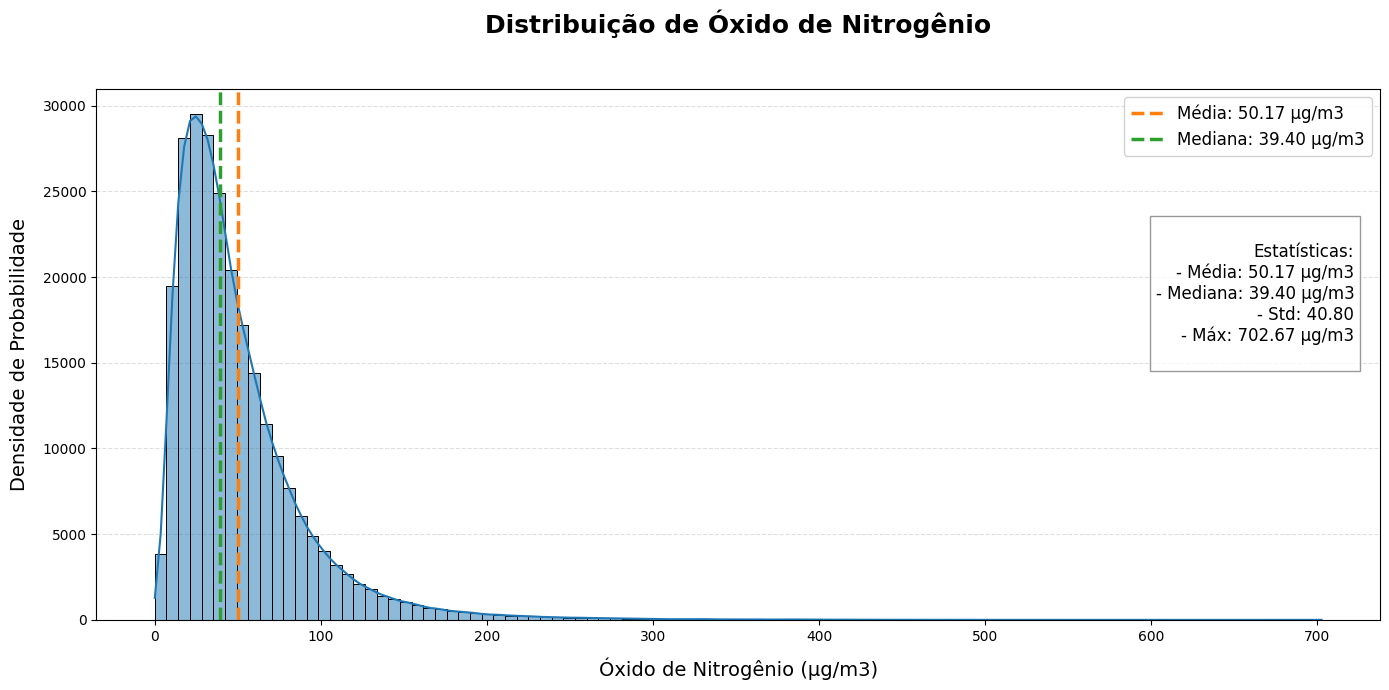

In [235]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='nox',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Óxido de Nitrogênio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Óxido de Nitrogênio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['nox'].mean()
median_val = df_sensor['nox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['nox'].std():.2f}
- Máx: {df_sensor['nox'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [236]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['nox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'nox'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'nox'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'nox'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para nox: Estatística = 0.808, p-valor = 0.000
nox NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 7.156821181845341e-33


In [237]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.130, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 4.095690649951368e-15


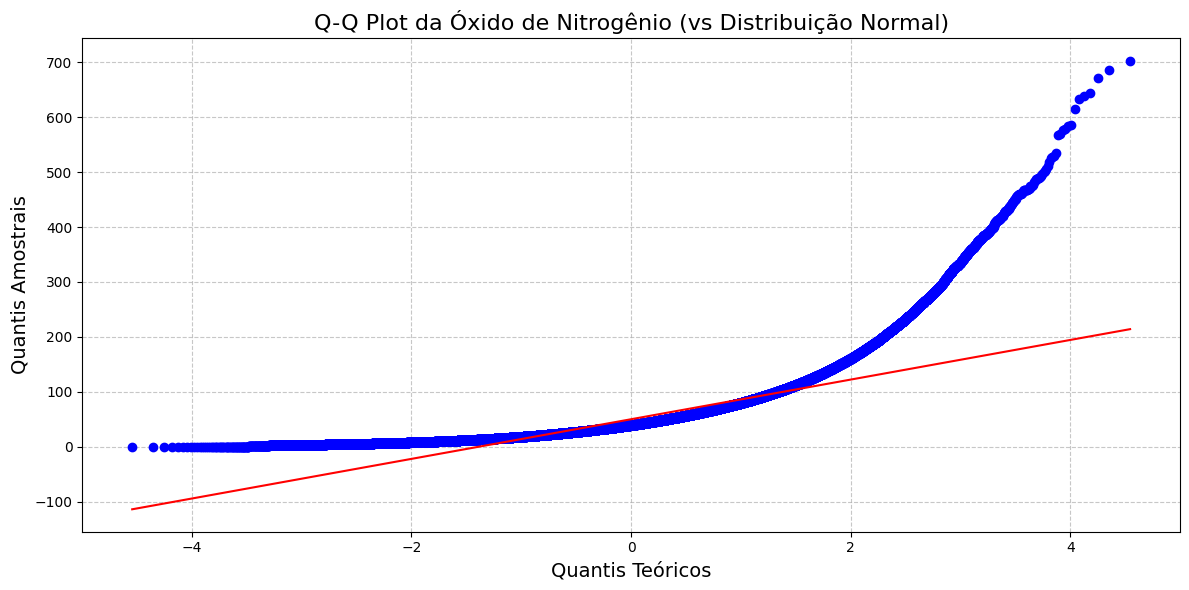

In [238]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['nox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Óxido de Nitrogênio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [239]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [240]:
df_sensor['nox_boxcox'] = np.nan

mask = (df_sensor['nox'].notna())

nox_validos = df_sensor.loc[mask, 'nox']

nox_boxcox, lambda_boxcox = stats.boxcox(nox_validos + 1)

df_sensor.loc[mask, 'nox_boxcox'] = nox_boxcox

### Testes de normalidade após Boxcox



In [241]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['nox_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'nox'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'nox'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'nox'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para nox: Estatística = 0.998, p-valor = 0.252
nox parece seguir uma distribuição normal (p > 0.05).
p_value gerado: 0.2517105178138419


In [242]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.022, p-valor = 0.720
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.7203629280945887


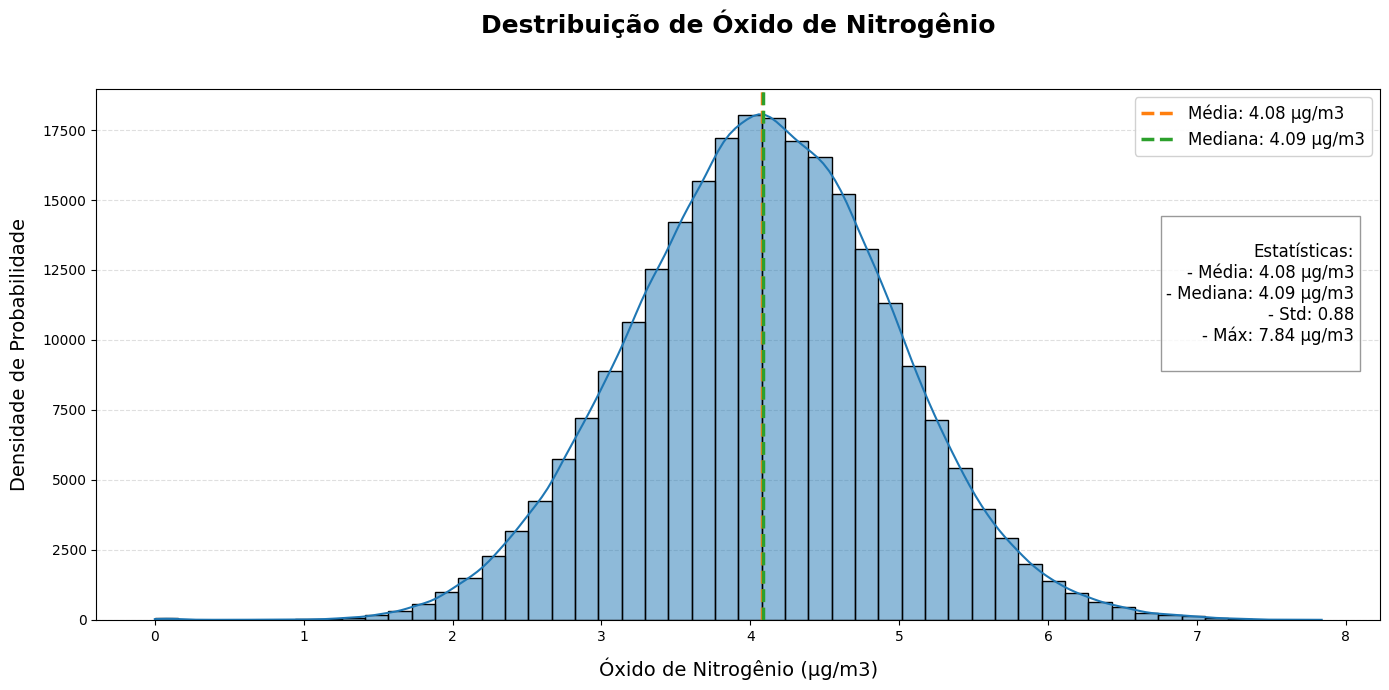

In [243]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='nox_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Óxido de Nitrogênio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Óxido de Nitrogênio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['nox_boxcox'].mean()
median_val = df_sensor['nox_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["nox_boxcox"].std():.2f}
- Máx: {df_sensor["nox_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

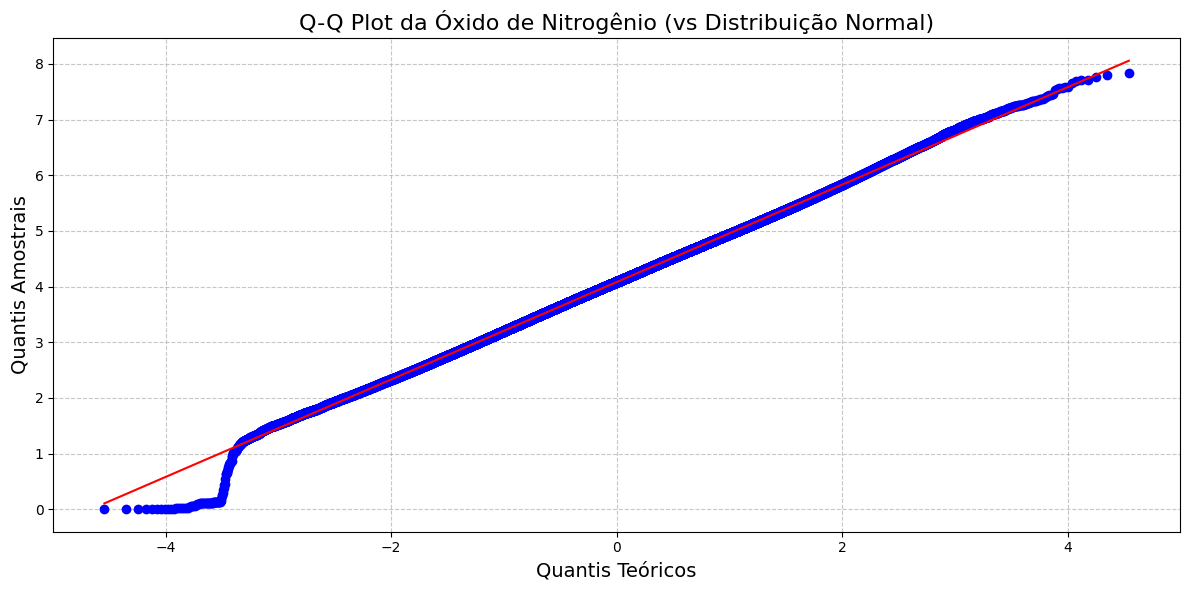

In [244]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['nox_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Óxido de Nitrogênio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna ur

In [245]:
#@title Dropando colunas nox e renomeando 'nox_boxcox' para nox

df_sensor.drop(columns=['nox'], inplace=True)
df_sensor.rename(columns={'nox_boxcox': 'nox'}, inplace=True)

## Dióxido de Enxofre

### Análise exploratória

In [246]:
#@title Describe dos dados

df_sensor['so2'].describe()

count    405128.000000
mean          4.358975
std           6.810326
min           0.000000
25%           0.730000
50%           2.430000
75%           5.240000
max         309.130000
Name: so2, dtype: float64

### Visualização gráfica

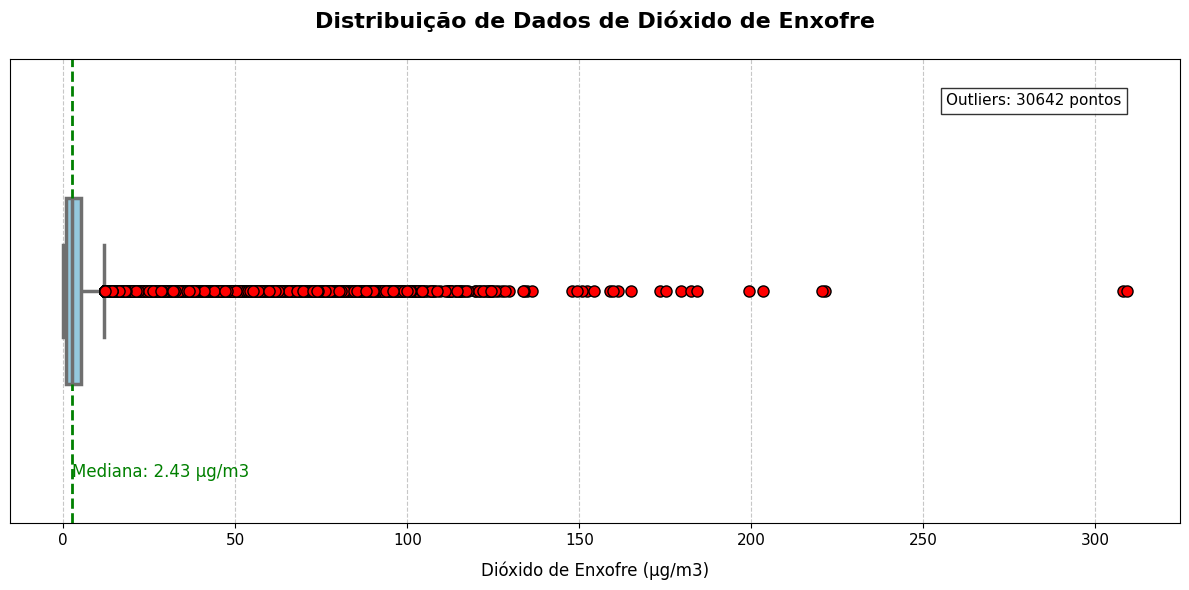

In [247]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['so2'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Dióxido de Enxofre\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Dióxido de Enxofre (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['so2'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['so2'].quantile(0.25)
q3 = df_sensor['so2'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['so2'] < q1 - 1.5*iqr) |
                            (df_sensor['so2'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

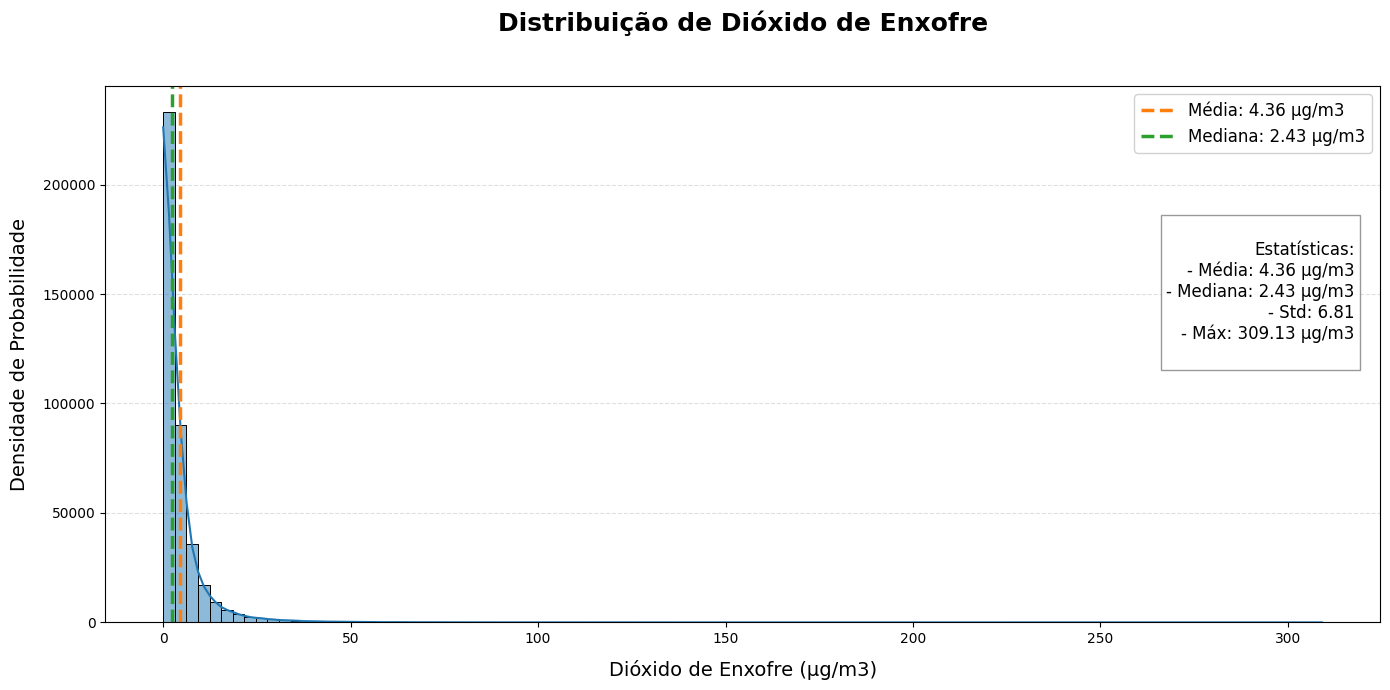

In [248]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='so2',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Dióxido de Enxofre\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Dióxido de Enxofre (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['so2'].mean()
median_val = df_sensor['so2'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['so2'].std():.2f}
- Máx: {df_sensor['so2'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [249]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['so2'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'so2'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'so2'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'so2'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para so2: Estatística = 0.653, p-valor = 0.000
so2 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 6.331524203238403e-41


In [250]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.238, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 3.1162996885896566e-50


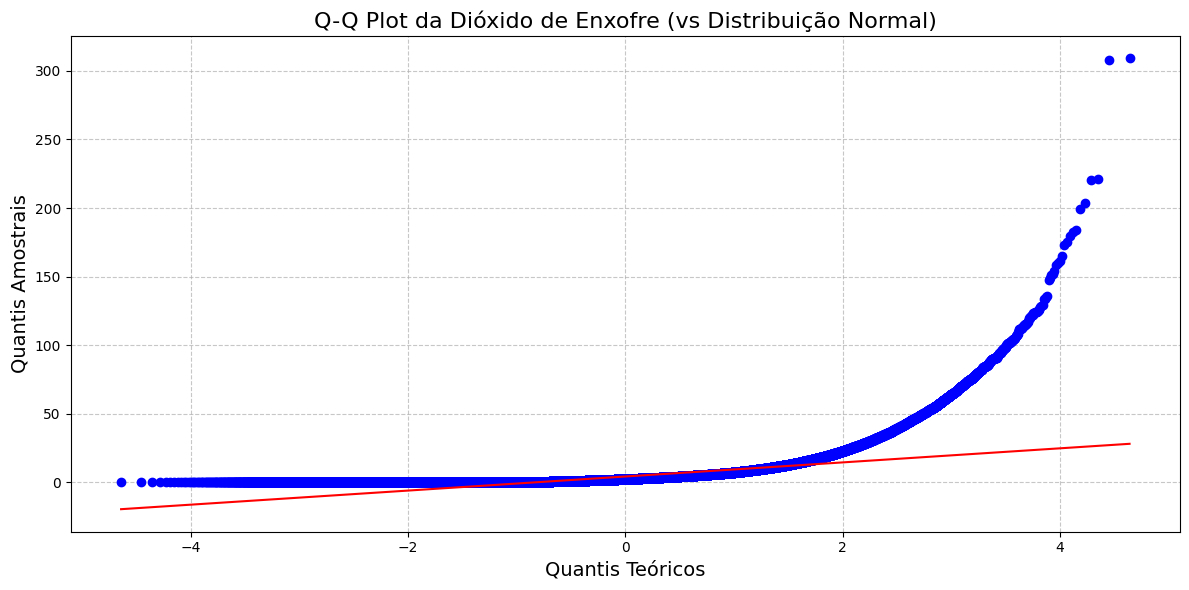

In [251]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['so2'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Dióxido de Enxofre (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [252]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [253]:
df_sensor['so2_boxcox'] = np.nan

mask = (df_sensor['so2'].notna())

so2_validos = df_sensor.loc[mask, 'so2']

so2_boxcox, lambda_boxcox = stats.boxcox(so2_validos + 1)

df_sensor.loc[mask, 'so2_boxcox'] = so2_boxcox

### Testes de normalidade após Boxcox



In [254]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['so2_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'so2'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'so2'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'so2'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para so2: Estatística = 0.966, p-valor = 0.000
so2 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 1.2161571426695503e-14


In [255]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.065, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 0.00046266315381969395


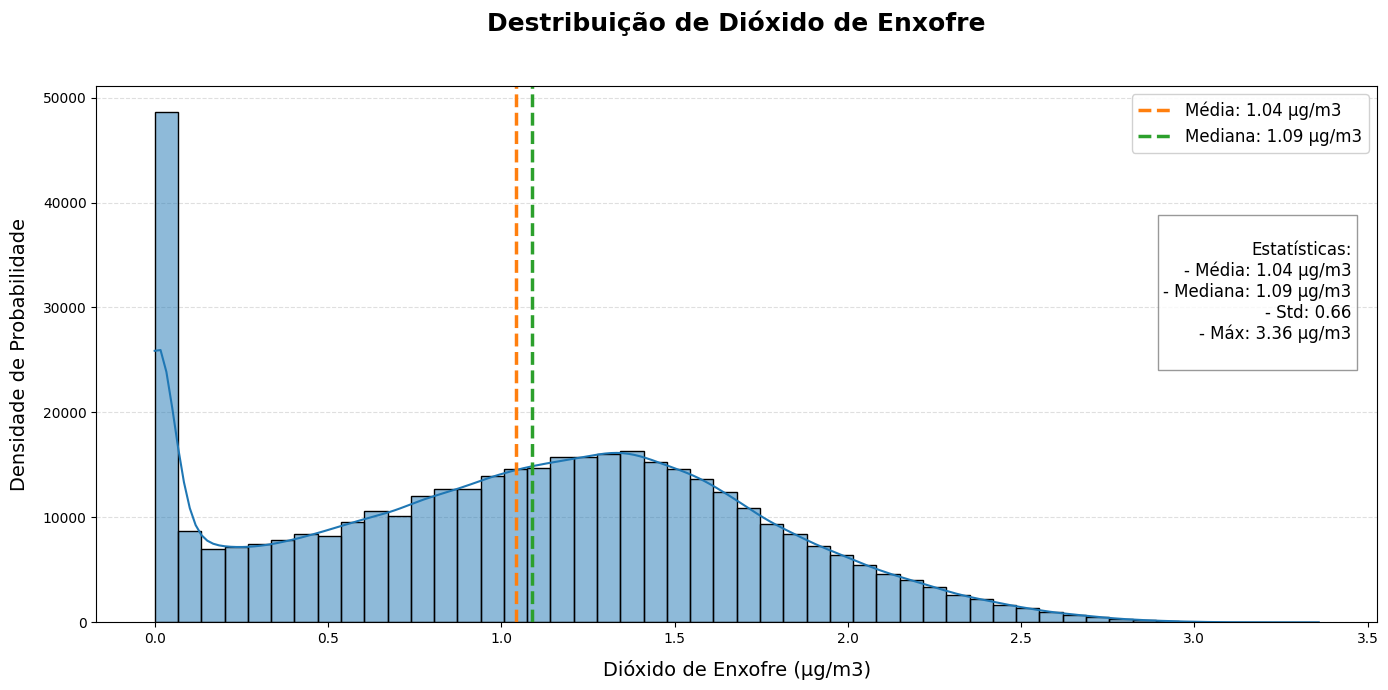

In [256]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='so2_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Dióxido de Enxofre\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Dióxido de Enxofre (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['so2_boxcox'].mean()
median_val = df_sensor['so2_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["so2_boxcox"].std():.2f}
- Máx: {df_sensor["so2_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

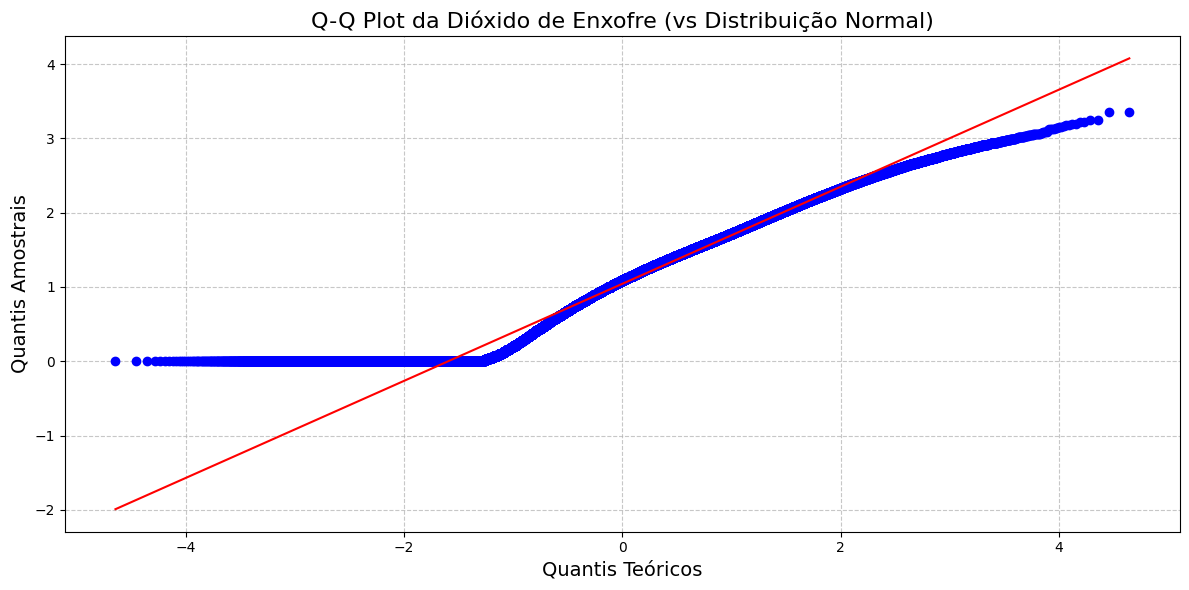

In [257]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['so2_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Dióxido de Enxofre (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna so2

In [258]:
#@title Dropando colunas so2 e renomeando 'so2_boxcox' para so2

df_sensor.drop(columns=['so2'], inplace=True)
df_sensor.rename(columns={'so2_boxcox': 'so2'}, inplace=True)

## Ozônio

### Análise exploratória

In [259]:
#@title Describe dos dados

df_sensor['o3'].describe()

count    525358.000000
mean         31.651056
std          29.860612
min           0.000000
25%           8.330000
50%          24.040000
75%          46.480000
max         355.450000
Name: o3, dtype: float64

### Visualização gráfica

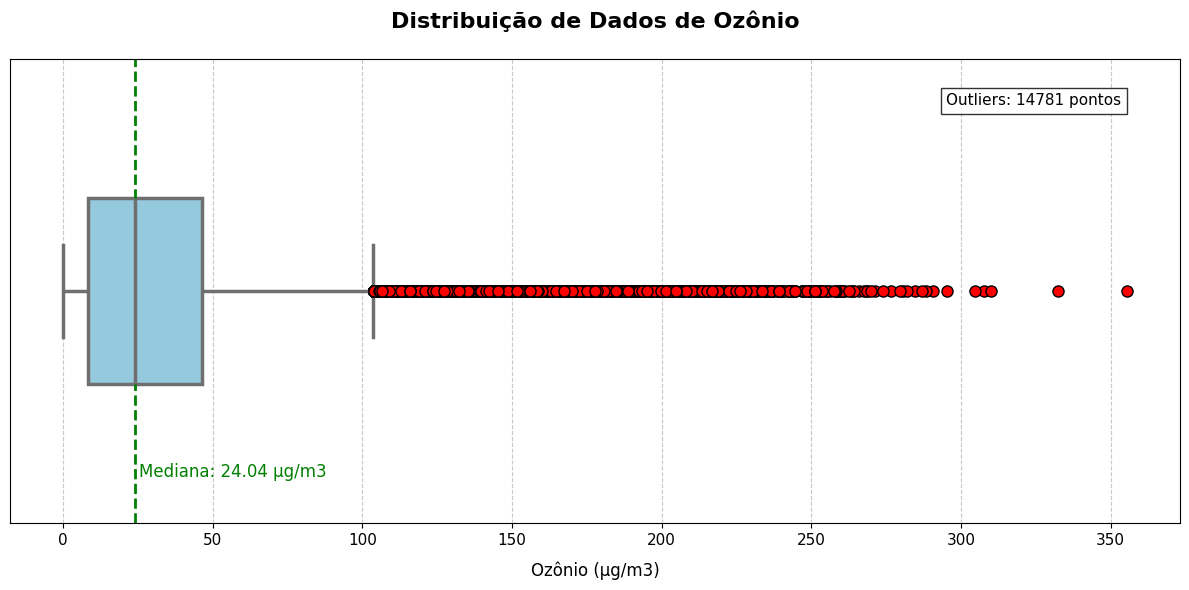

In [260]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['o3'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de Ozônio\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Ozônio (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['o3'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['o3'].quantile(0.25)
q3 = df_sensor['o3'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['o3'] < q1 - 1.5*iqr) |
                            (df_sensor['o3'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

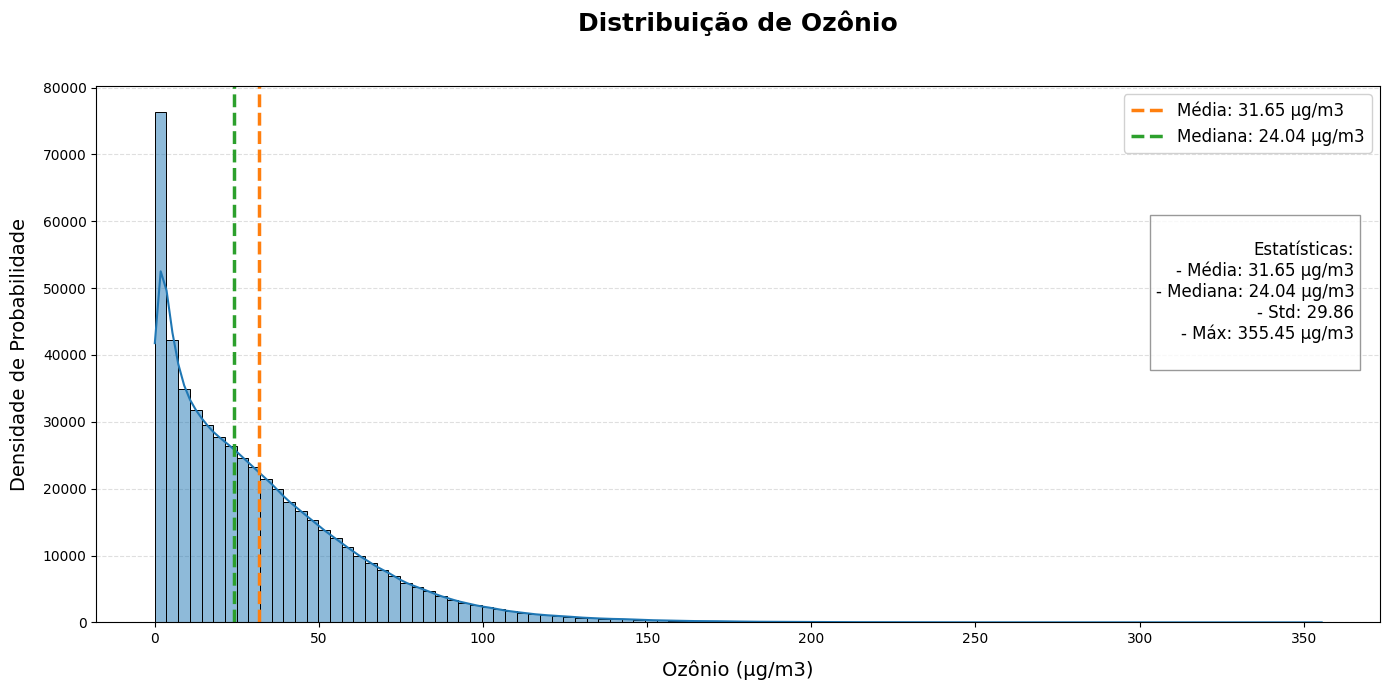

In [261]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='o3',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de Ozônio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Ozônio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['o3'].mean()
median_val = df_sensor['o3'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['o3'].std():.2f}
- Máx: {df_sensor['o3'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [262]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['o3'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'o3'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'o3'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'o3'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para o3: Estatística = 0.873, p-valor = 0.000
o3 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 9.387408242608408e-28


In [263]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.143, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 2.0129854522739265e-18


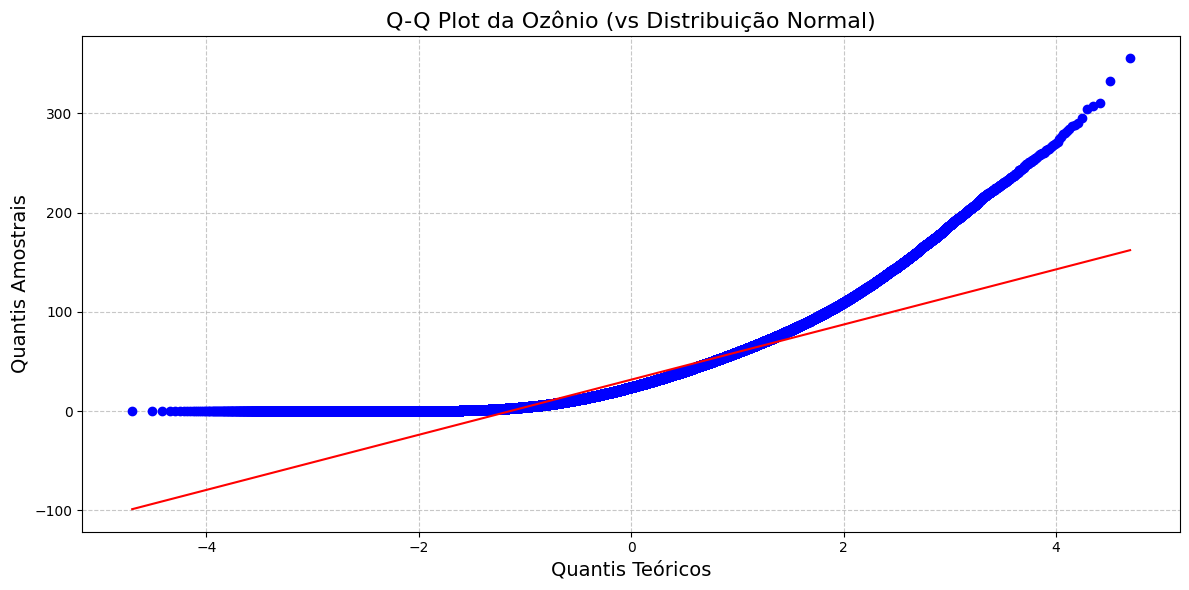

In [264]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['o3'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Ozônio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [265]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [266]:
df_sensor['o3_boxcox'] = np.nan

mask = (df_sensor['o3'].notna())

o3_validos = df_sensor.loc[mask, 'o3']

o3_boxcox, lambda_boxcox = stats.boxcox(o3_validos + 1)

df_sensor.loc[mask, 'o3_boxcox'] = o3_boxcox

### Testes de normalidade após Boxcox



In [267]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['o3_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'o3'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'o3'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'o3'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para o3: Estatística = 0.981, p-valor = 0.000
o3 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 4.0638662078816376e-10


In [268]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.041, p-valor = 0.072
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.07235179032240158


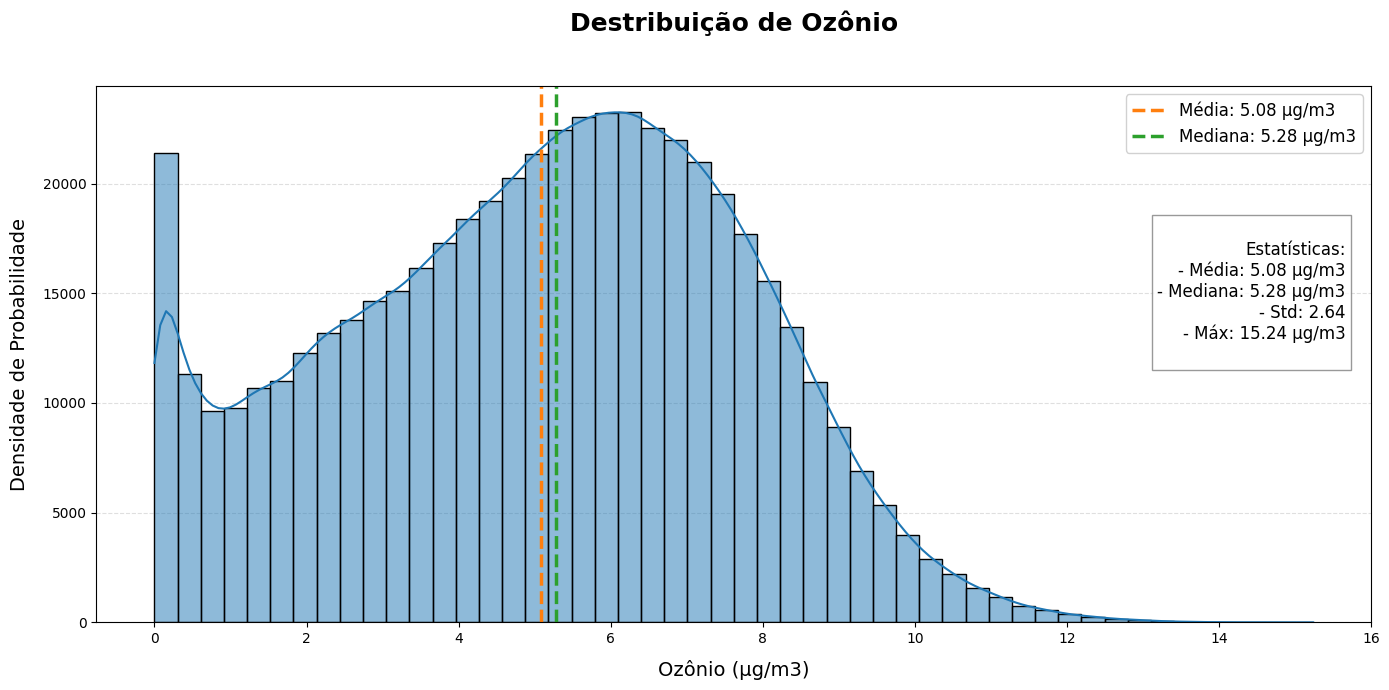

In [269]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='o3_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de Ozônio\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Ozônio (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['o3_boxcox'].mean()
median_val = df_sensor['o3_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["o3_boxcox"].std():.2f}
- Máx: {df_sensor["o3_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

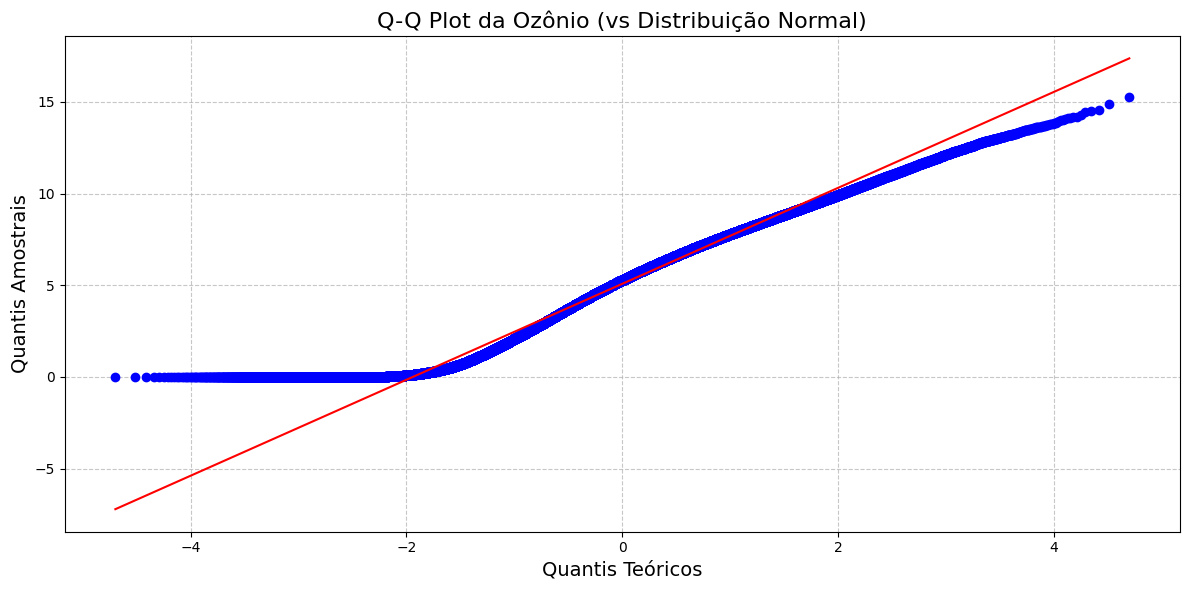

In [270]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['o3_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da Ozônio (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna so2

In [271]:
#@title Dropando colunas o3 e renomeando 'o3_boxcox' para o3

df_sensor.drop(columns=['o3'], inplace=True)
df_sensor.rename(columns={'o3_boxcox': 'o3'}, inplace=True)

## PM10

### Análise exploratória

In [272]:
#@title Describe dos dados

df_sensor['pm10'].describe()

count    526595.000000
mean         36.958700
std          23.720236
min           0.000000
25%          21.000000
50%          32.000000
75%          47.000000
max         994.000000
Name: pm10, dtype: float64

### Visualização gráfica

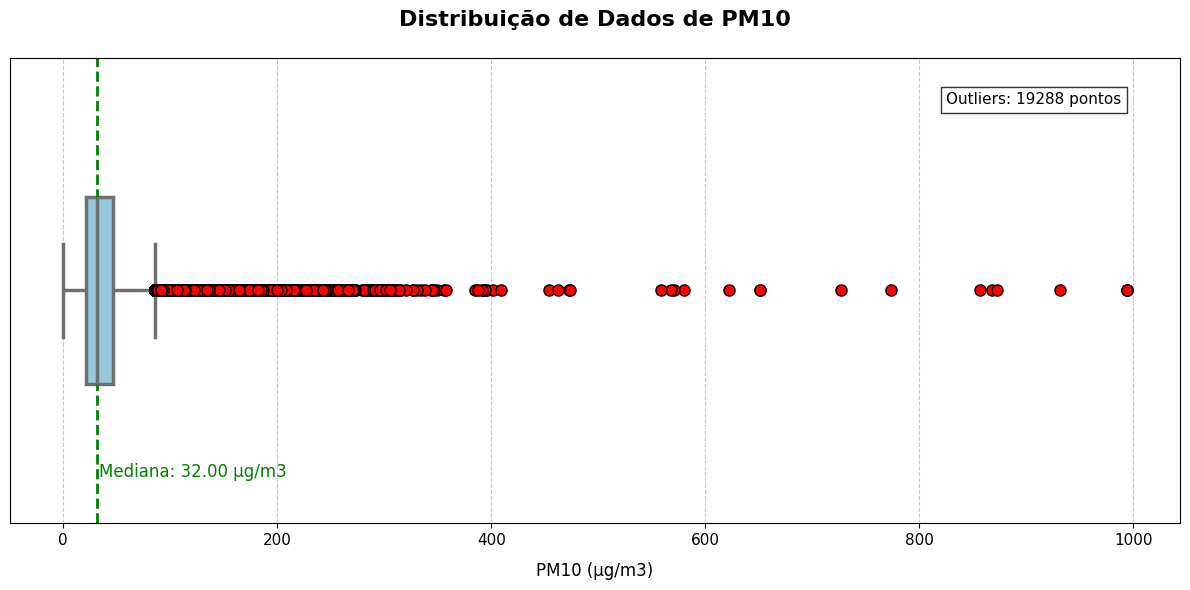

In [273]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['pm10'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de PM10\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('PM10 (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['pm10'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['pm10'].quantile(0.25)
q3 = df_sensor['pm10'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['pm10'] < q1 - 1.5*iqr) |
                            (df_sensor['pm10'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

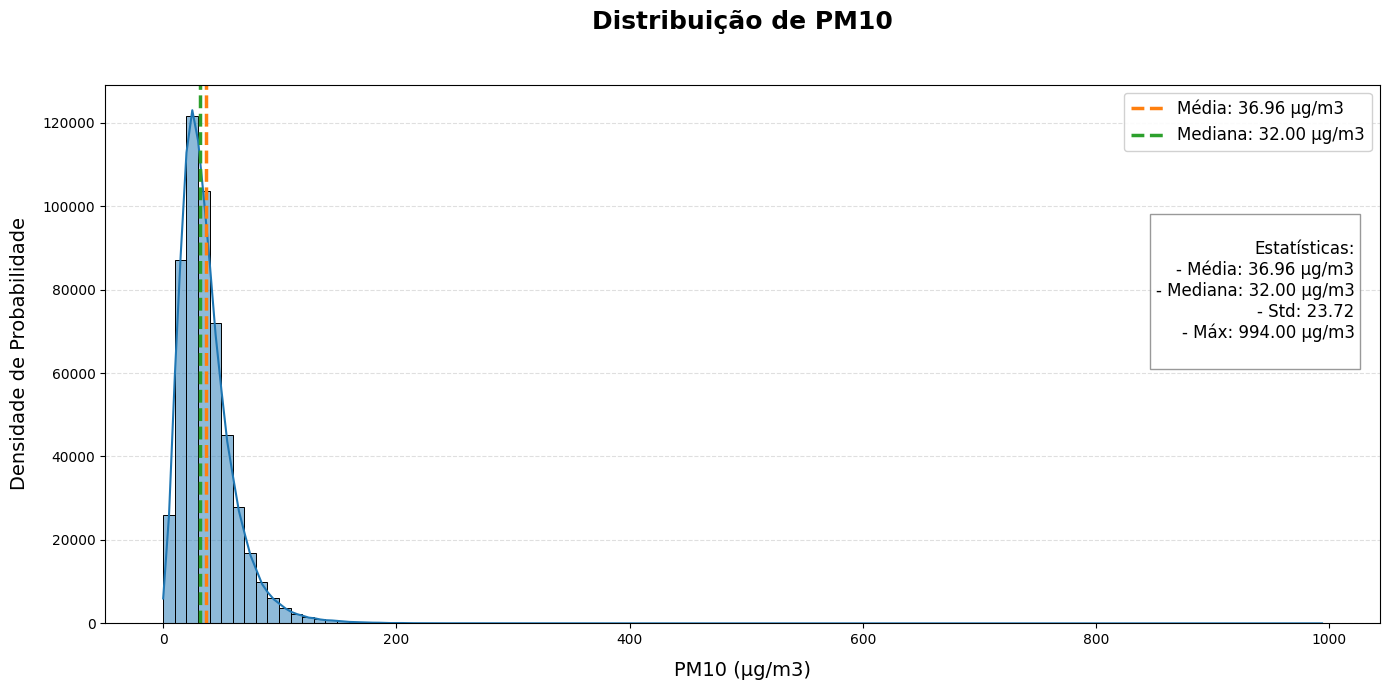

In [274]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='pm10',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de PM10\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('PM10 (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['pm10'].mean()
median_val = df_sensor['pm10'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['pm10'].std():.2f}
- Máx: {df_sensor['pm10'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [275]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['pm10'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'pm10'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'pm10'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'pm10'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para pm10: Estatística = 0.422, p-valor = 0.000
pm10 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 1.23825866627508e-48


In [276]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.197, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 1.7749969532505905e-34


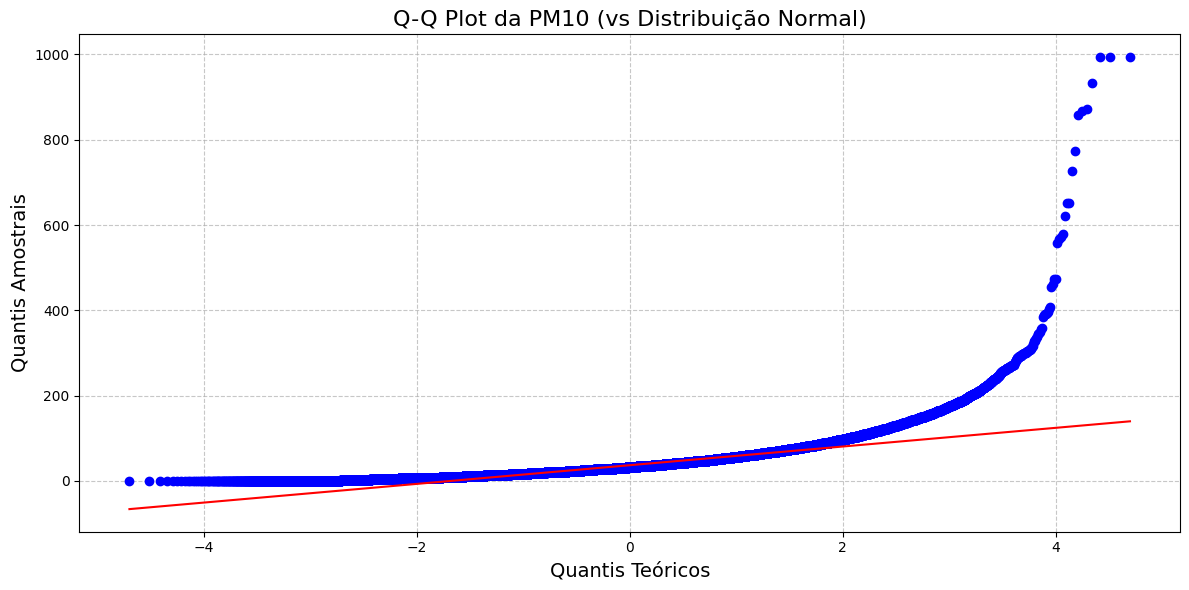

In [277]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['pm10'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da PM10 (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [278]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [279]:
df_sensor['pm10_boxcox'] = np.nan

mask = (df_sensor['pm10'].notna())

pm10_validos = df_sensor.loc[mask, 'pm10']

pm10_boxcox, lambda_boxcox = stats.boxcox(pm10_validos + 1)

df_sensor.loc[mask, 'pm10_boxcox'] = pm10_boxcox

### Testes de normalidade após Boxcox



In [280]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['pm10_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'pm10'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'pm10'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'pm10'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para pm10: Estatística = 0.957, p-valor = 0.000
pm10 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 1.457962481142967e-16


In [281]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.042, p-valor = 0.055
A amostra parece seguir uma distribuição normal.
p_value gerado: 0.05474828420380873


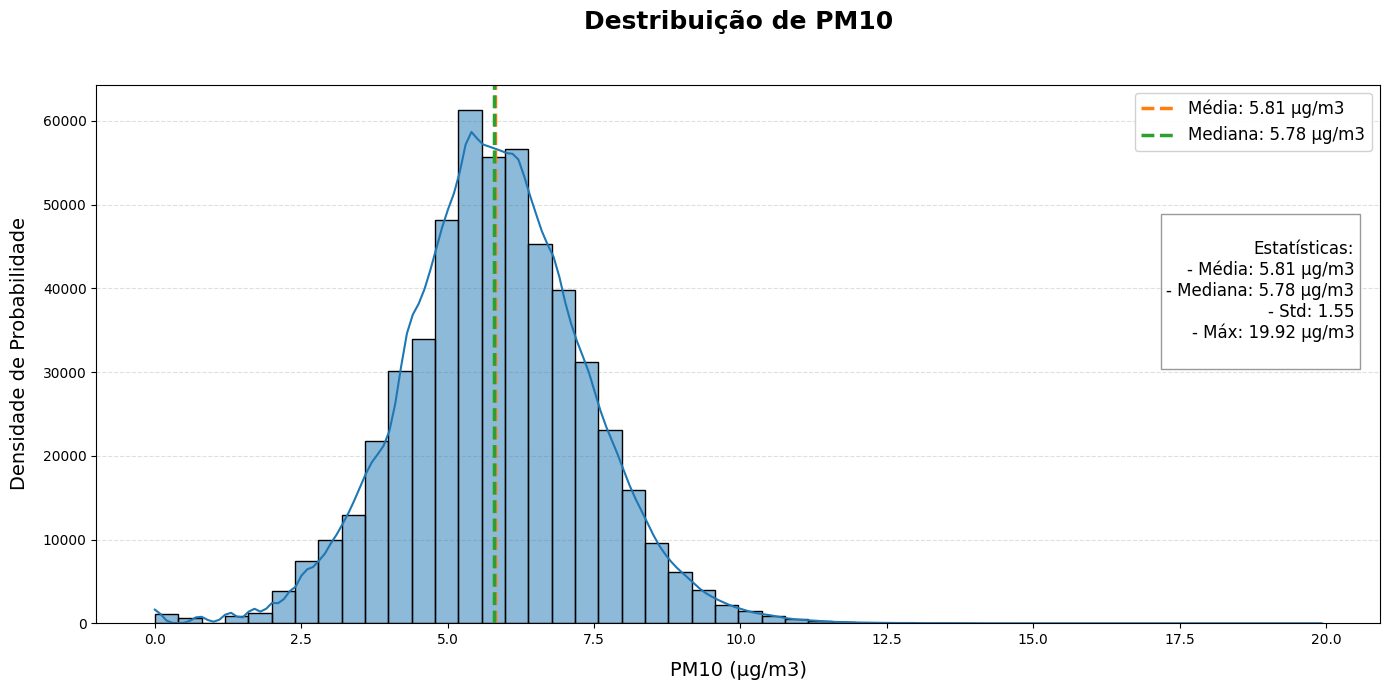

In [282]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='pm10_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de PM10\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('PM10 (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['pm10_boxcox'].mean()
median_val = df_sensor['pm10_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["pm10_boxcox"].std():.2f}
- Máx: {df_sensor["pm10_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

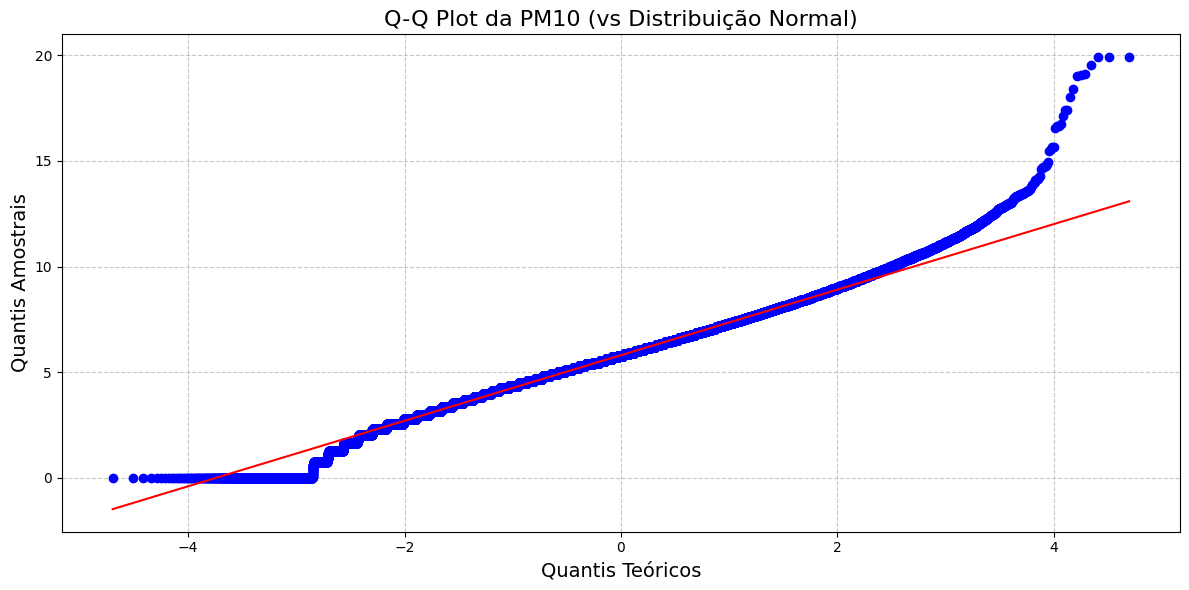

In [283]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['pm10_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da PM10 (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna PM10

In [284]:
#@title Dropando colunas pm10 e renomeando 'pm10_boxcox' para pm10

df_sensor.drop(columns=['pm10'], inplace=True)
df_sensor.rename(columns={'pm10_boxcox': 'pm10'}, inplace=True)

## PM2.5

### Análise exploratória

In [285]:
#@title Describe dos dados

df_sensor['pm2_5'].describe()

count    63960.000000
mean        17.222891
std         14.762144
min          0.000000
25%          8.000000
50%         13.000000
75%         22.000000
max        370.000000
Name: pm2_5, dtype: float64

### Visualização gráfica

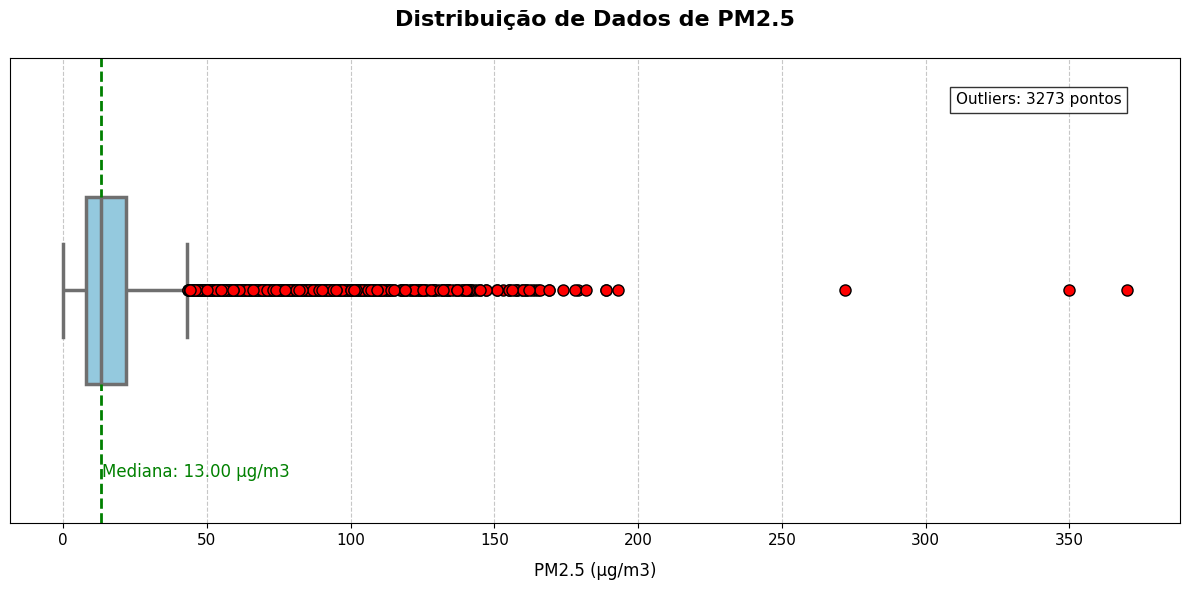

In [286]:
#@title Boxplot

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df_sensor['pm2_5'],
                 color='skyblue',
                 linewidth=2.5,
                 width=0.4,
                 flierprops=dict(marker='o',
                               markersize=8,
                               markerfacecolor='red',
                               markeredgecolor='black'))

plt.title('Distribuição de Dados de PM2.5\n',
          fontsize=16,
          fontweight='bold')
plt.xlabel('PM2.5 (µg/m3)',
           fontsize=12,
           labelpad=10)

plt.xticks(fontsize=11)
plt.yticks([])

plt.grid(axis='x',
         linestyle='--',
         alpha=0.7)

median_val = df_sensor['pm2_5'].median()
plt.axvline(median_val,
            color='green',
            linestyle='--',
            linewidth=2)
plt.text(median_val*1.05,
         0.4,
         f'Mediana: {median_val:.2f} µg/m3',
         color='green',
         fontsize=12)

# Adicionando informações sobre outliers
q1 = df_sensor['pm2_5'].quantile(0.25)
q3 = df_sensor['pm2_5'].quantile(0.75)
iqr = q3 - q1
outliers = df_sensor[(df_sensor['pm2_5'] < q1 - 1.5*iqr) |
                            (df_sensor['pm2_5'] > q3 + 1.5*iqr)]
plt.text(0.95,
         0.9,
         f'Outliers: {len(outliers)} pontos',
         transform=ax.transAxes,
         ha='right',
         fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

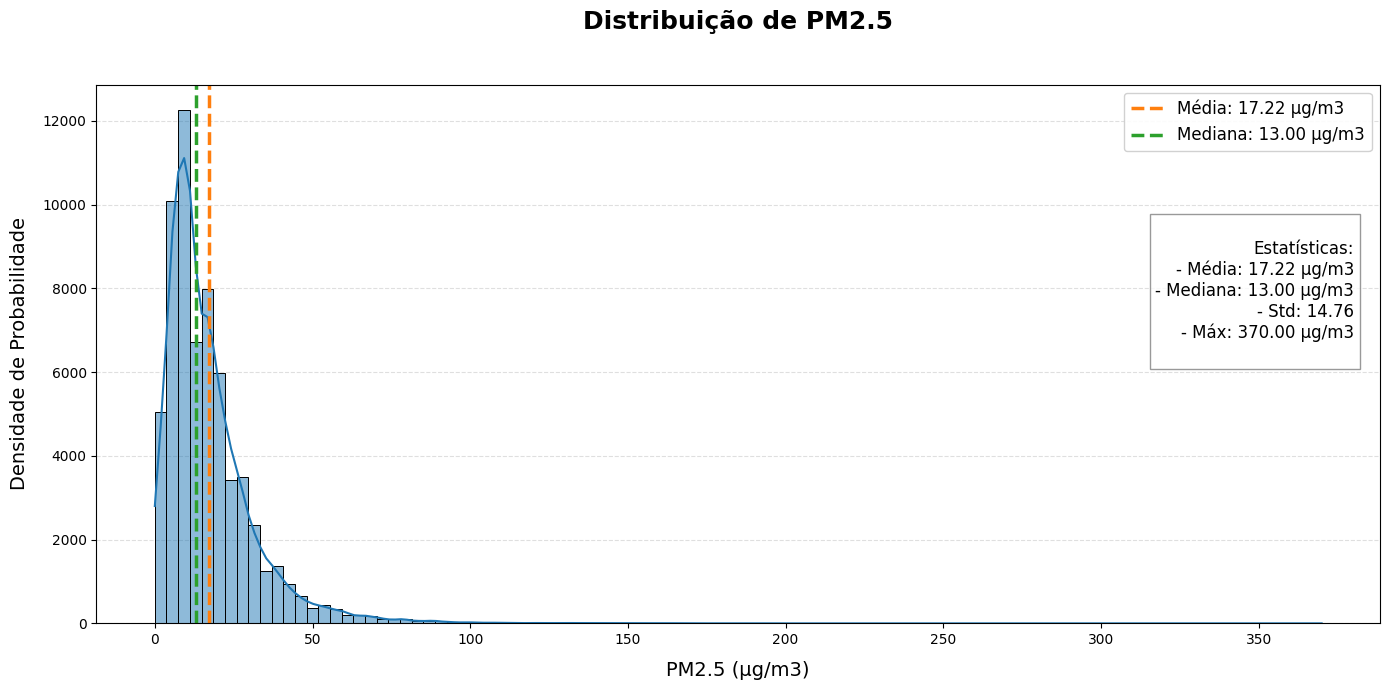

In [287]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='pm2_5',
                 kde=True, bins=100)

# Melhorias no título e labels
plt.title('Distribuição de PM2.5\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('PM2.5 (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['pm2_5'].mean()
median_val = df_sensor['pm2_5'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor['pm2_5'].std():.2f}
- Máx: {df_sensor['pm2_5'].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

### Testes de normalidade



In [288]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['pm2_5'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'pm2_5'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'pm2_5'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'pm2_5'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para pm2_5: Estatística = 0.852, p-valor = 0.000
pm2_5 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 1.382326137372214e-29


In [289]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.132, p-valor = 0.000
A amostra NÃO segue uma distribuição normal.
p_value gerado: 1.4599367806554491e-15


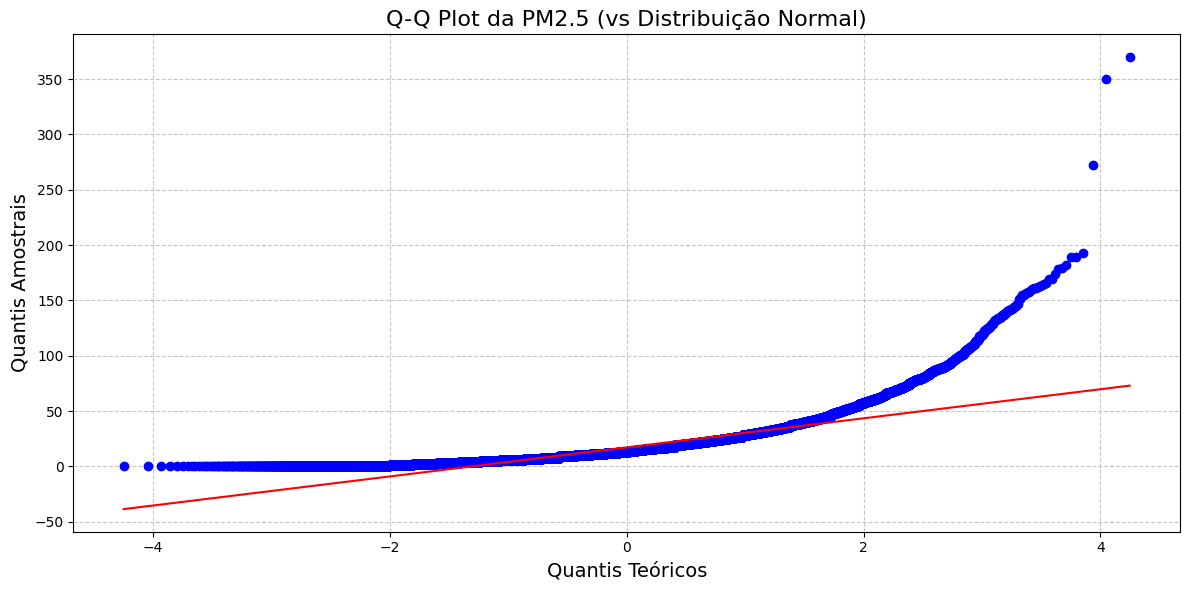

In [290]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['pm2_5'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da PM2.5 (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Transformação para Normalidade utilizando Boxcox

#### Transformação de Box-Cox

In [291]:
# # Cria a coluna para armazenar os valores transformados
# df_sensor['co_boxcox'] = np.nan

# # Identifica os valores não nulos
# mask = df_sensor['co'].notna()
# co_validos = df_sensor.loc[mask, 'co']

# lambda_boxcox = 0.5  # Altere este valor conforme necessário!
# df_sensor.loc[mask, 'co_boxcox'] = boxcox1p(co_validos, lambda_boxcox)

In [292]:
df_sensor['pm2_5_boxcox'] = np.nan

mask = (df_sensor['pm2_5'].notna())

pm2_5_validos = df_sensor.loc[mask, 'pm2_5']

pm2_5_boxcox, lambda_boxcox = stats.boxcox(pm2_5_validos + 1)

df_sensor.loc[mask, 'pm2_5_boxcox'] = pm2_5_boxcox

### Testes de normalidade após Boxcox



In [293]:
#@title Aplicando teste de Shapiro-Wilk (Shapiro-Wilk pode não ser preciso para amostras muito grandes (acima de 5000))

sample_size = 1000

np.random.seed(40)

random_sample = np.random.choice(df_sensor['pm2_5_boxcox'].dropna(), size=sample_size, replace=False)

stat, p_value = shapiro(random_sample)
print(f"Teste de Shapiro para {'pm2_5'}: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print(f"{'pm2_5'} parece seguir uma distribuição normal (p > 0.05).")
else:
    print(f"{'pm2_5'} NÃO segue uma distribuição normal (p <= 0.05).")

print(f"p_value gerado: {p_value}")

Teste de Shapiro para pm2_5: Estatística = 0.989, p-valor = 0.000
pm2_5 NÃO segue uma distribuição normal (p <= 0.05).
p_value gerado: 6.65343878523761e-07


In [294]:
#@title Aplicando teste de Kolmogorov-Smirnov

stat, p_value = kstest(random_sample, 'norm', args=(np.mean(random_sample), np.std(random_sample)))
print(f"Teste de Kolmogorov-Smirnov: Estatística = {stat:.3f}, p-valor = {p_value:.3f}")
if p_value > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra NÃO segue uma distribuição normal.")

print(f"p_value gerado: {p_value}")

Teste de Kolmogorov-Smirnov: Estatística = 0.046, p-valor = 0.028
A amostra NÃO segue uma distribuição normal.
p_value gerado: 0.027720130421376554


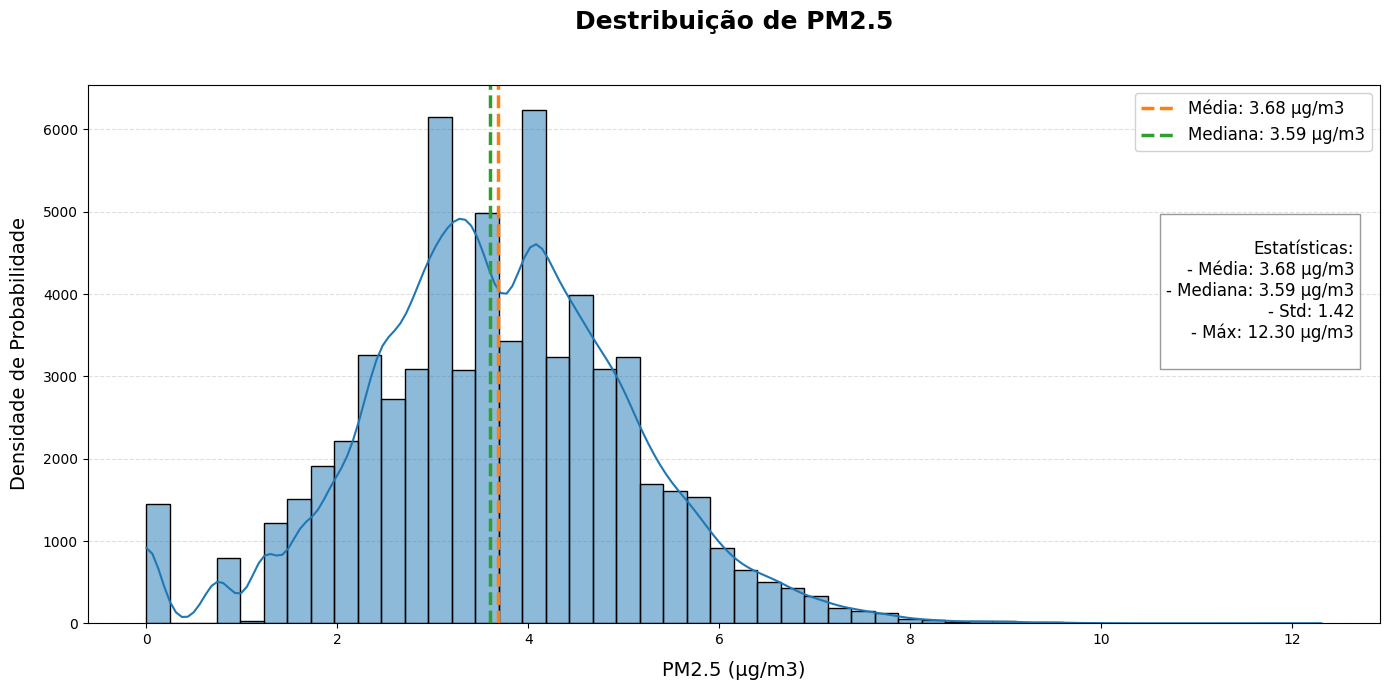

In [295]:
#@title Histograma

plt.figure(figsize=(14, 7))
ax = sns.histplot(data=df_sensor, x='pm2_5_boxcox',
                 kde=True, bins=50)

# Melhorias no título e labels
plt.title('Destribuição de PM2.5\n',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('PM2.5 (µg/m3)', fontsize=14, labelpad=10)
plt.ylabel('Densidade de Probabilidade', fontsize=14, labelpad=10)

# Grid e eixos
plt.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# Adicionando linhas de referência importantes
mean_val = df_sensor['pm2_5_boxcox'].mean()
median_val = df_sensor['pm2_5_boxcox'].median()
plt.axvline(mean_val, color='#ff7f0e', linestyle='--', linewidth=2.5, label=f'Média: {mean_val:.2f} µg/m3')
plt.axvline(median_val, color='#2ca02c', linestyle='--', linewidth=2.5, label=f'Mediana: {median_val:.2f} µg/m3')

# Estatísticas no gráfico
stats_text = f'''
Estatísticas:
- Média: {mean_val:.2f} µg/m3
- Mediana: {median_val:.2f} µg/m3
- Std: {df_sensor["pm2_5_boxcox"].std():.2f}
- Máx: {df_sensor["pm2_5_boxcox"].max():.2f} µg/m3
'''
plt.text(0.98, 0.75, stats_text, transform=ax.transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Melhorando a legenda
plt.legend(fontsize=12, framealpha=0.9)

plt.tight_layout()
plt.show()

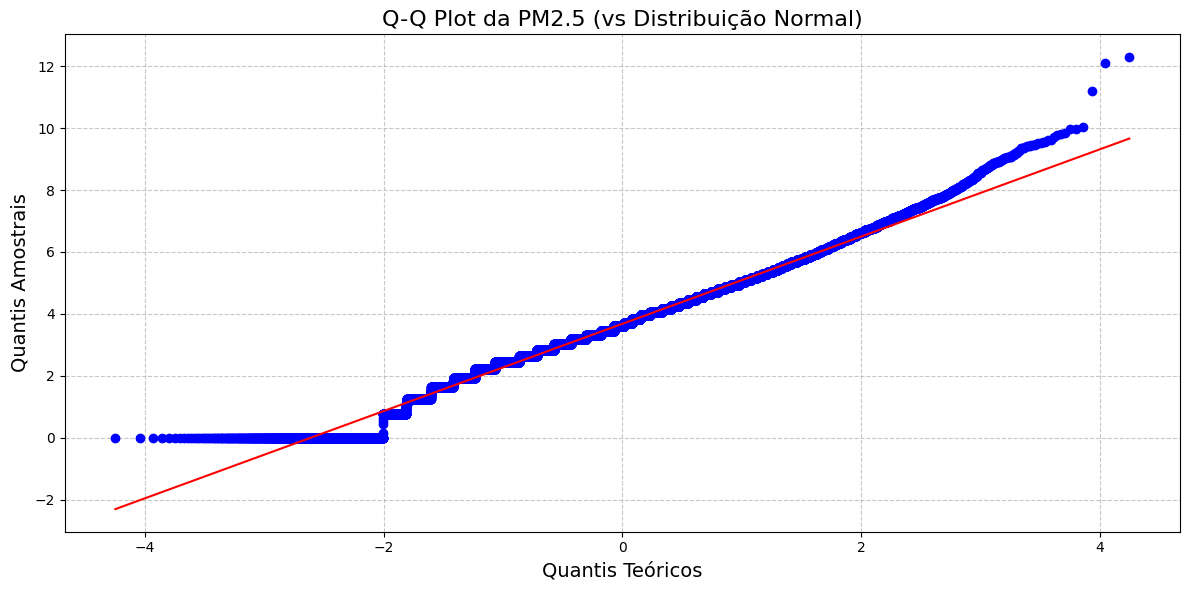

In [296]:
#@title Q-Q plot

plt.figure(figsize=(12, 6))
stats.probplot(df_sensor['pm2_5_boxcox'].dropna(), dist="norm", plot=plt)

plt.title("Q-Q Plot da PM2.5 (vs Distribuição Normal)", fontsize=16)
plt.xlabel("Quantis Teóricos", fontsize=14)
plt.ylabel("Quantis Amostrais", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Dropando e renomeando coluna PM2.5

In [297]:
#@title Dropando colunas pm2_5 e renomeando 'pm2_5_boxcox' para pm2_5

df_sensor.drop(columns=['pm2_5'], inplace=True)
df_sensor.rename(columns={'pm2_5_boxcox': 'pm2_5'}, inplace=True)

## Gerando CSV de saída com as medições com o Boxcox aplicado


In [299]:
droping_columns = ['no_nulos_no_dia', 'no2_nulos_no_dia', 'nox_nulos_no_dia']

df_sensor.drop(columns=droping_columns, inplace=True)

In [300]:
df_sensor.to_csv('medicoes-sensores-boxcox.csv', index=False)